# **Project Name**:    -  **E-Commerce Customer Satisfaction Score Prediction Model**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Problem Statement**


**OVERVIEW**


Customer satisfaction is a crucial factor in the e-commerce sector, directly impacting customer loyalty, repeat purchases, and word-of-mouth referrals. Traditionally, businesses have measured satisfaction through surveys, which are often time-consuming and may fail to reflect the complete customer experience. With advancements in deep learning, companies can now predict satisfaction scores in real time, providing deeper insights into service quality and enabling faster identification of areas that need improvement.

**Project Goal**

This project aims to predict Customer Satisfaction (CSAT) scores using Deep Learning techniques, specifically Artificial Neural Networks (ANN). In the e-commerce domain, analyzing customer interactions and feedback is essential for improving service quality, driving customer retention, and supporting business growth. By harnessing the power of neural network models, the goal is to accurately forecast CSAT scores from diverse interaction-related features, ultimately delivering actionable insights that can guide service enhancements and strategic decision-making.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and ANN building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight

import joblib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csat_df= pd.read_csv('/content/drive/My Drive/Datasets/Intro_to_Deep_Learning/eCommerce_Customer_support_data.csv')

### Dataset First View

In [ ]:
# Dataset First
csat_df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Shape

In [ ]:
csat_df.shape

(85907, 20)

### Dataset Info

In [ ]:
csat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Checking for Duplicate Valuesa

In [ ]:
len(csat_df[csat_df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
csat_df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


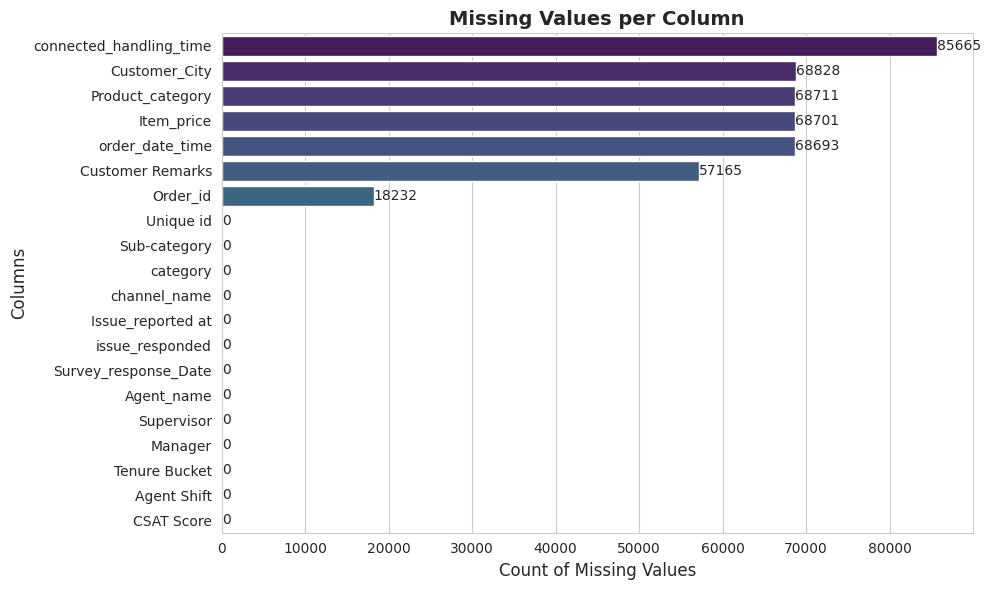

In [ ]:
# Missing Values Visualization
# Step 1: Calculate missing values
missing_values = csat_df.isnull().sum().sort_values(ascending=False)

# Step 2: Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # clean background
barplot = sns.barplot(
    x=missing_values.values,
    y=missing_values.index,
    palette="viridis"  # nice color gradient
)

# Add value labels on bars
for index, value in enumerate(missing_values.values):
    plt.text(value + 0.5, index, str(value), va='center')

# Labels and title
plt.xlabel("Count of Missing Values", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.title("Missing Values per Column", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### **What did you know about your dataset?**

The dataset provided originates from the **e-commerce industry** and is focused on analyzing **Customer Satisfaction Score (CSAT)** along with the key insights that drive it.

**Customer Satisfaction Score (CSAT)** serves as a critical **Key Performance Indicator (KPI)**, reflecting how satisfied customers are with a company’s products, services, or overall shopping experience. Within the e-commerce context, CSAT evaluates factors such as product quality, website usability, delivery speed, and the effectiveness of customer service.

As a vital metric, CSAT not only highlights customer perceptions and experiences but also plays a pivotal role in shaping both short-term performance and long-term business growth.

The dataset contains **85,907 rows and 20 columns**. While there are **no duplicate records**, some columns do include **missing values**, particularly in:

* *Customer\_city*
* *Product\_category*
* *Item\_price*
* *Order\_id*
* *Order\_date\_time*
* *Customer\_remarks*
* *Connected\_handling\_time*

This dataset offers a comprehensive foundation for exploring patterns, identifying pain points, and uncovering actionable insights that can help optimize the e-commerce customer experience and improve CSAT performance.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
csat_df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Dataset Describe
csat_df.describe(include='all')

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


## **Dataset Description**

**Unique id:** Unique identifier for each record (integer).

**Channel name:** Name of the customer service channel (object/string),3 unique channel name.

**Category:** Category of the interaction (object/string) ,12 unique category.

**Sub-category:** Sub-category of the interaction (object/string),57 unique sub-category.

**Customer Remarks:** Feedback provided by the customer (object/string).

**Order id:** Identifier for the order associated with the interaction (integer).

**Order date time:** Date and time of the order (datetime).

**Issue reported at:** Timestamp when the issue was reported (datetime).

**Issue responded:** Timestamp when the issue was responded to (datetime).

**Survey response date:** Date of the customer survey response (datetime).

**Customer city:** City of the customer (object/string),1782 unique Customer city.

**Product category:** Category of the product (object/string),9 unique product category.

**Item price:** Price of the item (float).

**Connected handling time:** Time taken to handle the interaction (float).

**Agent name:** Name of the customer service agent (object/string),1371 unique agent name.

**Supervisor:** Name of the supervisor (object/string),40 unique Supervisor.

**Manager:** Name of the manager (object/string),6 unique manager.

**Tenure Bucket:** Bucket categorizing agent tenure (object/string).

**Agent Shift:** Shift timing of the agent (object/string).

**CSAT Score:** Customer Satisfaction (CSAT) score (integer) (Target-Variable).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each column
for col in csat_df.columns:
    print(f"Column: {col} --> Unique Values: {csat_df[col].nunique()}")

Column: Unique id --> Unique Values: 85907
Column: channel_name --> Unique Values: 3
Column: category --> Unique Values: 12
Column: Sub-category --> Unique Values: 57
Column: Customer Remarks --> Unique Values: 18231
Column: Order_id --> Unique Values: 67675
Column: order_date_time --> Unique Values: 13766
Column: Issue_reported at --> Unique Values: 30923
Column: issue_responded --> Unique Values: 30262
Column: Survey_response_Date --> Unique Values: 31
Column: Customer_City --> Unique Values: 1782
Column: Product_category --> Unique Values: 9
Column: Item_price --> Unique Values: 2789
Column: connected_handling_time --> Unique Values: 211
Column: Agent_name --> Unique Values: 1371
Column: Supervisor --> Unique Values: 40
Column: Manager --> Unique Values: 6
Column: Tenure Bucket --> Unique Values: 5
Column: Agent Shift --> Unique Values: 5
Column: CSAT Score --> Unique Values: 5


## 3. **Data Preprocessing**

### Handling Missing Values

In [ ]:
# Count missing values per column
missing_values = csat_df.isnull().sum().sort_values(ascending=False)
print("\nMissing Values per Column:\n", missing_values)


# Example: Fill missing categorical columns with mode
for col in csat_df.select_dtypes(include=['object']).columns:
    csat_df[col].fillna(csat_df[col].mode()[0], inplace=True)

# Example: Fill missing numerical columns with median
for col in csat_df.select_dtypes(include=['float64','int64']).columns:
    csat_df[col].fillna(csat_df[col].median(), inplace=True)


Missing Values per Column:
 connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
Unique id                      0
Sub-category                   0
category                       0
channel_name                   0
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


In [ ]:
# Copy dataset
final_df = csat_df.copy()

# Step 1: Drop 'Order_id' (as it's bnot relevant for our analysis)
final_df.drop(columns=['Order_id'], inplace=True)

In [ ]:
final_df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Step 2: Handle 'Customer Remarks'
final_df['Customer Remarks'] = final_df['Customer Remarks'].fillna("No Review")

In [ ]:
# Step 3: Handle categorical missing values
for col in ['Customer_City', 'Product_category']:
    if col in final_df.columns:
        # Option 1: Fill with "Unknown"
        final_df[col] = final_df[col].fillna("Unknown")
        # Option 2: (Alternative) Fill with mode
        # df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Step 4: Handle numerical missing values
if 'Item_price' in final_df.columns:
    final_df['Item_price'] = final_df['Item_price'].fillna(final_df['Item_price'].median())

In [ ]:
# Step 5: Handle 'order_date_time'
if 'order_date_time' in final_df.columns:
    final_df['order_date_time'] = pd.to_datetime(final_df['order_date_time'], errors='coerce')

#Impute missing values in 'order_date_time' with mode
final_df['order_date_time'].fillna(final_df['order_date_time'].mode()[0], inplace=True)

In [ ]:
# Step 6: Handle 'connected_handling_time'
# Step 4: Impute missing values in numerical columns ('connected_handling_time' and 'item_price')
# Impute 'connected_handling_time' with mean
final_df['connected_handling_time'].fillna(final_df['connected_handling_time'].mean(), inplace=True)


#### Although connected_handling_time is a known driver of CSAT, it was dropped due to 99% missing values, which makes it unreliable in this dataset.

Alternatively we have Created a binary feature → has_handling_time (1 if value present, 0 if missing).

This way, the model at least learns whether handling time was recorded, which sometimes correlates with customer dissatisfaction.

In [ ]:
#Step 7: Final Check
print("✅ Final Dataset Shape:", final_df.shape)
print("\n✅ Missing Values After Preprocessing:\n", final_df.isnull().sum().sort_values(ascending=False).head())

✅ Final Dataset Shape: (85907, 19)

✅ Missing Values After Preprocessing:
 Unique id           0
channel_name        0
category            0
Sub-category        0
Customer Remarks    0
dtype: int64


In [ ]:
final_df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,Good,2023-09-08 11:55:00,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,HYDERABAD,Electronics,979.0,427.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,Good,2023-09-08 11:55:00,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,HYDERABAD,Electronics,979.0,427.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,Good,2023-09-08 11:55:00,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,HYDERABAD,Electronics,979.0,427.0,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,Good,2023-09-08 11:55:00,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,HYDERABAD,Electronics,979.0,427.0,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,Good,2023-09-08 11:55:00,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,HYDERABAD,Electronics,979.0,427.0,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


## 4. **Data Wrangling (Exploratory Data Analaysis)**

In [ ]:
# Create a copy of the dataset
final_df1 = final_df.copy()

# Count customers with the highest satisfaction score (CSAT = 5)
print("No. of customers interaction and feedbacks with highest customer satisfaction scores:",
      len(final_df1[final_df1['CSAT Score'] == 5]))

# Store data for highest CSAT scores
df_best_score = final_df1[final_df1['CSAT Score'] == 5]

# Store data for lowest CSAT scores
df_least_score = final_df1[final_df1['CSAT Score'] == 1]


No. of customers interaction and feedbacks with highest customer satisfaction scores: 59617


### Distribution of Target Variable (CSAT Score)

In [ ]:
final_df1['CSAT Score'].value_counts()

,count
CSAT Score,
5,59617
1,11230
4,11219
3,2558
2,1283


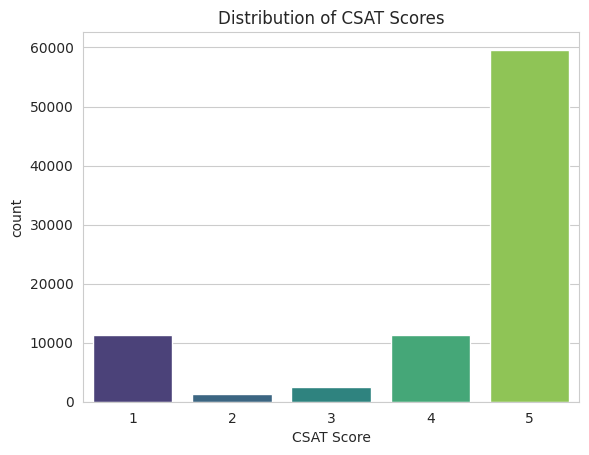

In [ ]:
sns.countplot(data=final_df1, x="CSAT Score", palette="viridis")
plt.title("Distribution of CSAT Scores")
plt.show()

## Categorical Feature Analysis

### Channel vs CSAT

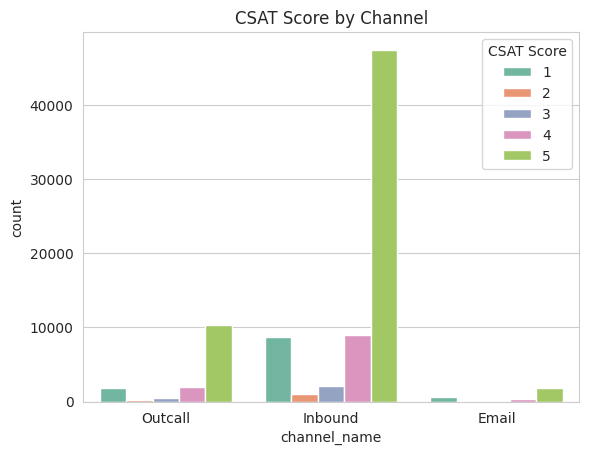

In [ ]:
sns.countplot(data=final_df1, x="channel_name", hue="CSAT Score", palette="Set2")
plt.title("CSAT Score by Channel")
plt.show()

### Agent Shift vs CSAT

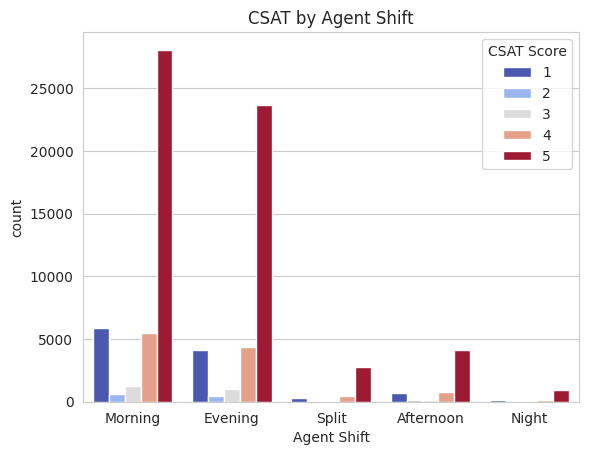

In [ ]:
sns.countplot(data=final_df1, x="Agent Shift", hue="CSAT Score", palette="coolwarm")
plt.title("CSAT by Agent Shift")
plt.show()

## Numerical Feature Analysis

### Item Price Distribution

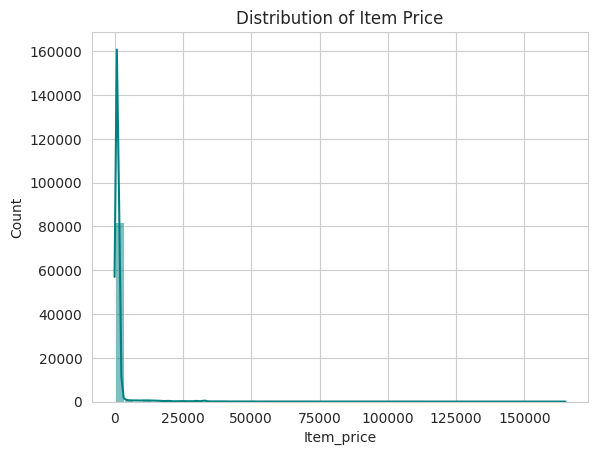

In [ ]:
sns.histplot(final_df1["Item_price"], kde=True, bins=50, color="teal")
plt.title("Distribution of Item Price")
plt.show()

### Correlation Analysis (Numerical)

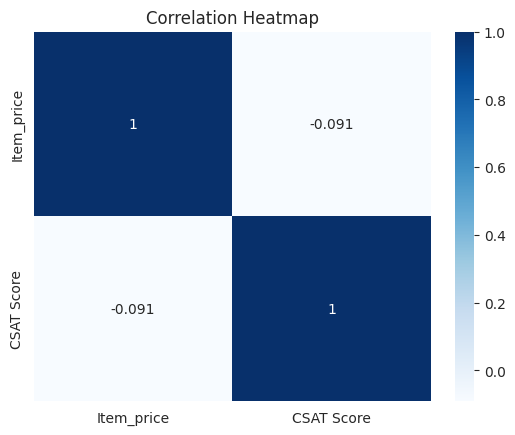

In [ ]:
corr = final_df1[["Item_price", "CSAT Score"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

### Top 5 Product Category with highest Customer Satisfaction Score

In [ ]:
# Groupby Product_category Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Product_category').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
Product_category,
Electronics,51865
LifeStyle,2689
Books & General merchandise,2117
Mobile,982
Home,832


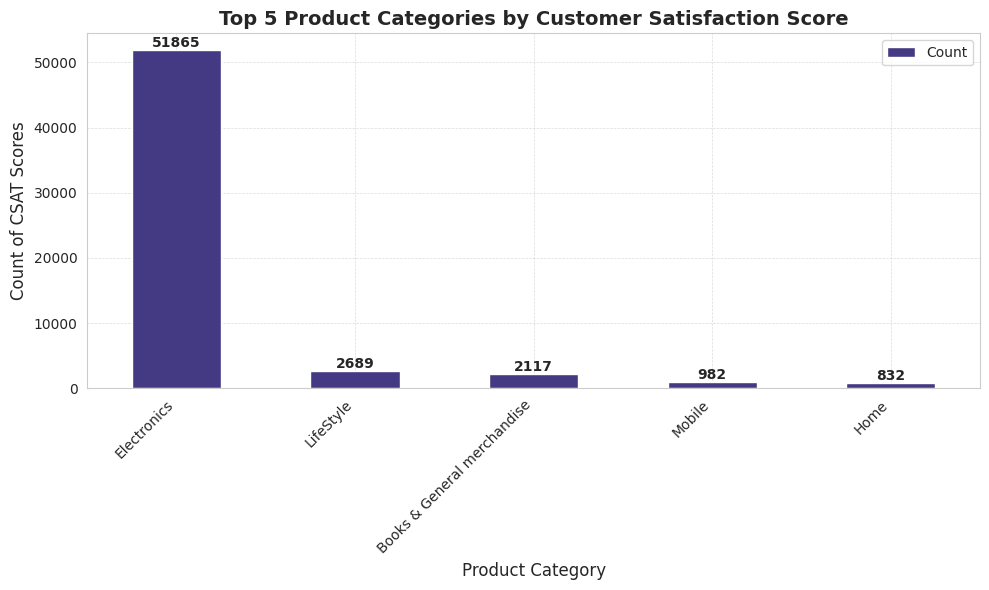

In [ ]:
# Plotting the top 5 product categories with highest CSAT Scores
fig, ax = plt.subplots(figsize=(10, 6))

# Better bar plot with color palette
bars = grouped_df[:5].plot(
    kind='bar',
    ax=ax,
    color=sns.color_palette("viridis", len(grouped_df[:5]))
)

# Adding labels and title
ax.set_xlabel('Product Category', fontsize=12)
ax.set_ylabel('Count of CSAT Scores', fontsize=12)
ax.set_title('Top 5 Product Categories by Customer Satisfaction Score', fontsize=14, fontweight='bold')

# Rotating the x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Adding value labels on bars
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Adding grid for better readability
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()


### **Top 5 Category with highest customer satisfaction score**

In [ ]:
# Groupby Customer_City Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('category').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
category,
Returns,31977
Order Related,15090
Refund Related,3137
Product Queries,2257
Shopzilla Related,2009


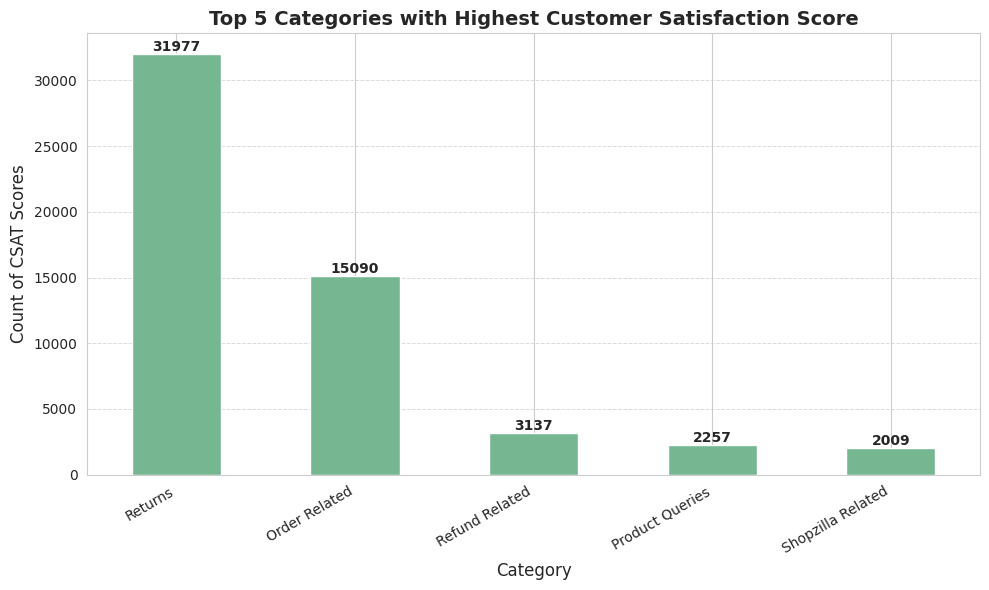

In [ ]:
# Improved bar chart for Top 5 Categories by CSAT Score
fig, ax = plt.subplots(figsize=(10, 6))

# Plot with custom colors
bars = grouped_df[:5].plot(
    kind='bar',
    ax=ax,
    legend=False,
    color=sns.color_palette("crest", len(grouped_df[:5]))
)

# Adding labels and title
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Count of CSAT Scores', fontsize=12)
ax.set_title('Top 5 Categories with Highest Customer Satisfaction Score', fontsize=14, fontweight='bold')

# Rotating x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

# Adding subtle grid
ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Tight layout for neatness
plt.tight_layout()

# Show the plot
plt.show()

### **Top 5 Sub Category with highest Customer Satisfaction Score**

In [ ]:
# Groupby Sub-category Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Sub-category').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
Sub-category,
Reverse Pickup Enquiry,15233
Return request,6718
Order status enquiry,4764
Delayed,4604
Fraudulent User,3279


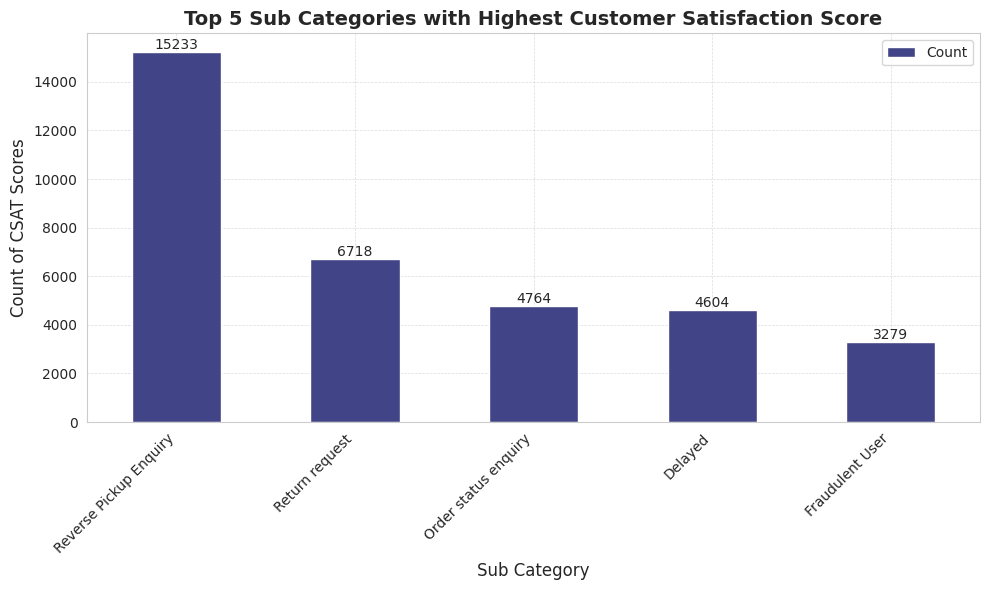

In [ ]:
# Plotting Top 5 Sub Categories by CSAT Score counts
fig, ax = plt.subplots(figsize=(10, 6))

# Plot only the top 5 aggregated values with a clean style
grouped_df[:5].plot(kind='bar', ax=ax, color=plt.cm.viridis(np.linspace(0.2, 0.8, len(grouped_df[:5]))))

# Labels and title
ax.set_xlabel('Sub Category', fontsize=12)
ax.set_ylabel('Count of CSAT Scores', fontsize=12)
ax.set_title('Top 5 Sub Categories with Highest Customer Satisfaction Score', fontsize=14, fontweight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right")

# Add grid for readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%d')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### **Top 5 cities with highest customer satisfaction score**

In [ ]:
# Groupby Customer_City Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Customer_City').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
Customer_City,
HYDERABAD,49354
NEW DELHI,425
PUNE,226
MUMBAI,214
BANGALORE,201


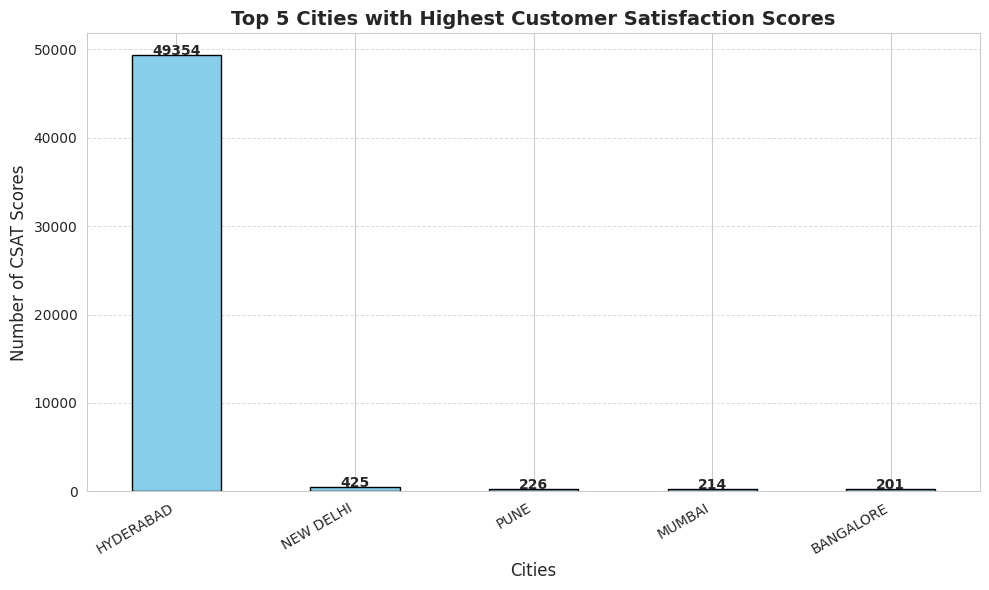

In [ ]:
# Plotting the top 5 cities by CSAT score counts
fig, ax = plt.subplots(figsize=(10, 6))

# Plot as bar chart with custom colors
grouped_df[:5].plot(kind='bar', ax=ax, color="skyblue", edgecolor="black", legend=False)

# Adding labels and title
ax.set_xlabel('Cities', fontsize=12)
ax.set_ylabel('Number of CSAT Scores', fontsize=12)
ax.set_title('Top 5 Cities with Highest Customer Satisfaction Scores', fontsize=14, fontweight='bold')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=30, ha="right", fontsize=10)

# Adding grid (only horizontal for better readability)
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Annotating bar values
for i, v in enumerate(grouped_df[:5].values.flatten()):
    ax.text(i, v + 2, str(v), ha='center', fontsize=10, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

### **Top 3 best performing Managers**

In [ ]:
# Groupby Manager Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Manager').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Manager,
John Smith,17844
Michael Lee,12353
Jennifer Nguyen,10575


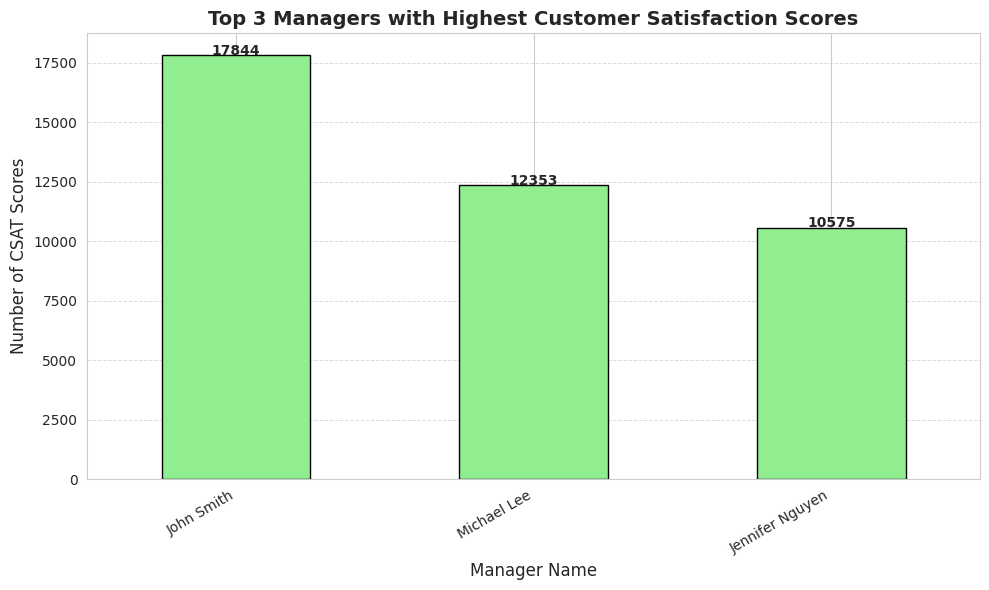

In [ ]:
# Plotting top 3 managers with highest CSAT scores
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot with better aesthetics
grouped_df[:3].plot(kind='bar', ax=ax, color="lightgreen", edgecolor="black", legend=False)

# Labels and title
ax.set_xlabel('Manager Name', fontsize=12)
ax.set_ylabel('Number of CSAT Scores', fontsize=12)
ax.set_title('Top 3 Managers with Highest Customer Satisfaction Scores', fontsize=14, fontweight='bold')

# Rotate x-axis labels
plt.xticks(rotation=30, ha="right", fontsize=10)

# Add horizontal grid only for readability
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Annotate values above bars
for i, v in enumerate(grouped_df[:3].values.flatten()):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

### **Top 3 best performing Agents**

In [ ]:
# Groupby Agent_name Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Agent_name').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Agent_name,
Wendy Taylor,299
David Smith,218
Timothy Huff,211


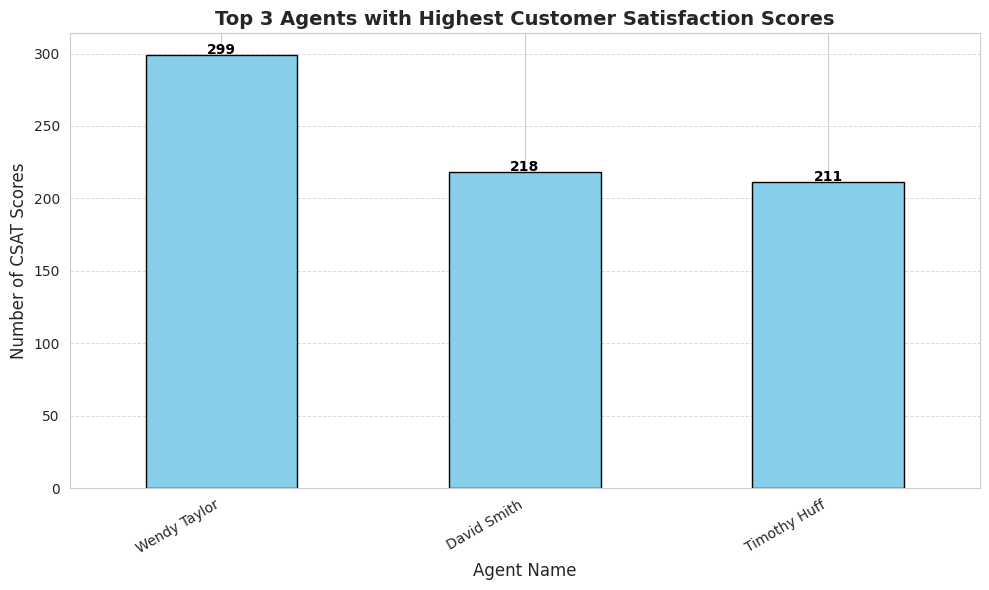

In [ ]:
# Plotting top 3 agents with highest CSAT scores
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot
grouped_df[:3].plot(kind='bar', ax=ax, color="skyblue", edgecolor="black", legend=False)

# Adding labels and title
ax.set_xlabel('Agent Name', fontsize=12)
ax.set_ylabel('Number of CSAT Scores', fontsize=12)
ax.set_title('Top 3 Agents with Highest Customer Satisfaction Scores', fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha="right", fontsize=10)

# Add horizontal grid only
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Annotate bar values
for i, v in enumerate(grouped_df[:3].values.flatten()):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10, fontweight='bold', color="black")

# Adjust layout
plt.tight_layout()
plt.show()

### **Top 3 best performing Supervisors**

In [ ]:
# Groupby Supervisor Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Supervisor').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Supervisor,
Carter Park,2921
Elijah Yamaguchi,2870
Nathan Patel,2576


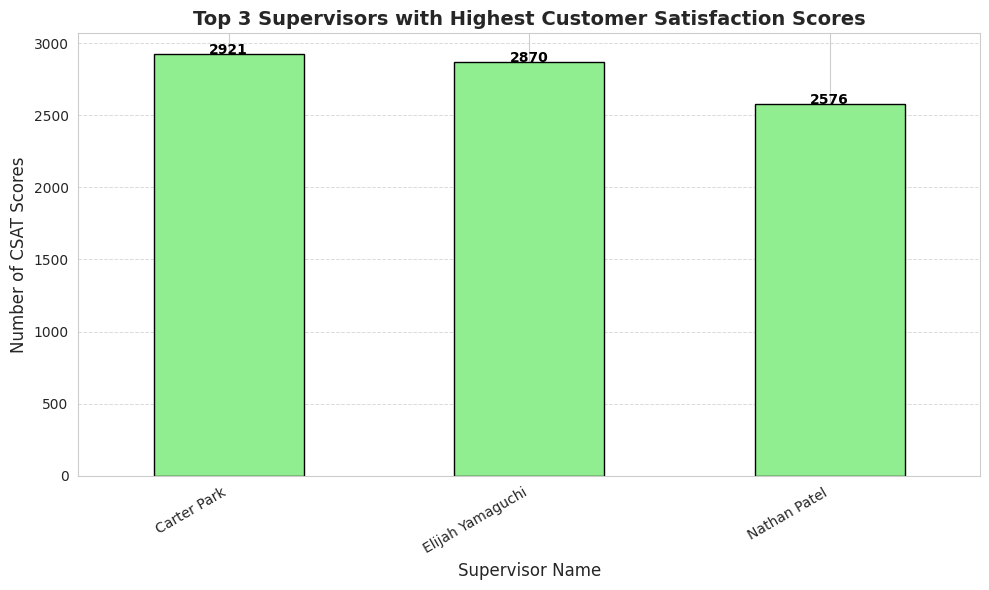

In [ ]:
# Plotting top 3 supervisors with highest CSAT scores
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot
grouped_df[:3].plot(kind='bar', ax=ax, color="lightgreen", edgecolor="black", legend=False)

# Adding labels and title
ax.set_xlabel('Supervisor Name', fontsize=12)
ax.set_ylabel('Number of CSAT Scores', fontsize=12)
ax.set_title('Top 3 Supervisors with Highest Customer Satisfaction Scores', fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha="right", fontsize=10)

# Add horizontal grid only
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Annotate bar values on top of bars
for i, v in enumerate(grouped_df[:3].values.flatten()):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10, fontweight='bold', color="black")

# Adjust layout
plt.tight_layout()
plt.show()

### **Which tenure group of employees is performing the best?**

In [ ]:
# Groupby Supervisor Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Tenure Bucket').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Tenure Bucket,
>90,21678
On Job Training,16860
31-60,8301


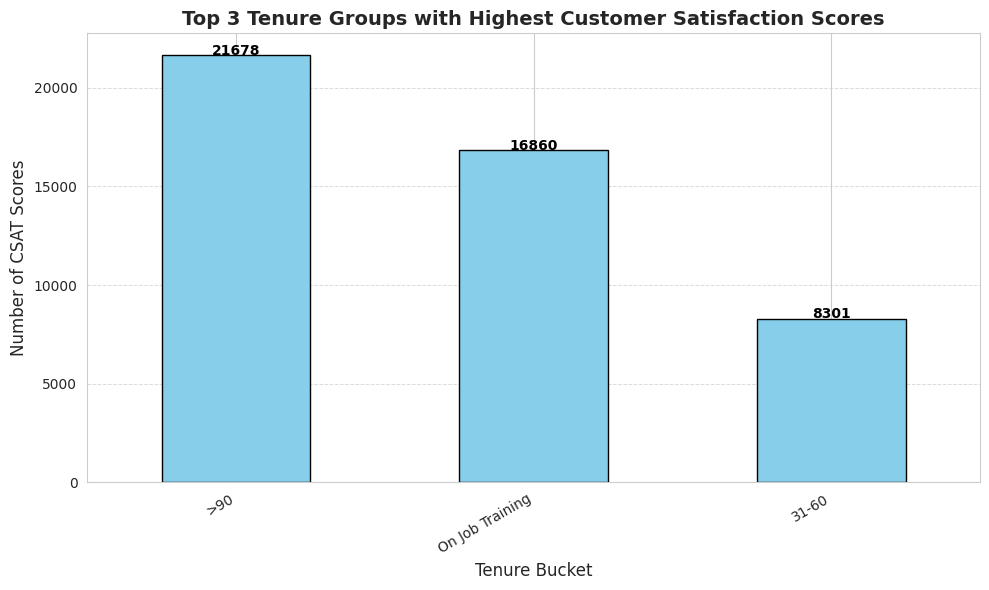

In [ ]:
# Plotting top 3 tenure buckets with highest CSAT scores
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot
grouped_df[:3].plot(kind='bar', ax=ax, color="skyblue", edgecolor="black", legend=False)

# Adding labels and title
ax.set_xlabel('Tenure Bucket', fontsize=12)
ax.set_ylabel('Number of CSAT Scores', fontsize=12)
ax.set_title('Top 3 Tenure Groups with Highest Customer Satisfaction Scores', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha="right", fontsize=10)

# Add horizontal grid only
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Annotate bar values on top of bars
for i, v in enumerate(grouped_df[:3].values.flatten()):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10, fontweight='bold', color="black")

# Adjust layout
plt.tight_layout()
plt.show()

### **Which shift timings of agents is performing the best?**

In [ ]:
# Groupby Supervisor Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Agent Shift').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Agent Shift,
Morning,28087
Evening,23680
Afternoon,4153


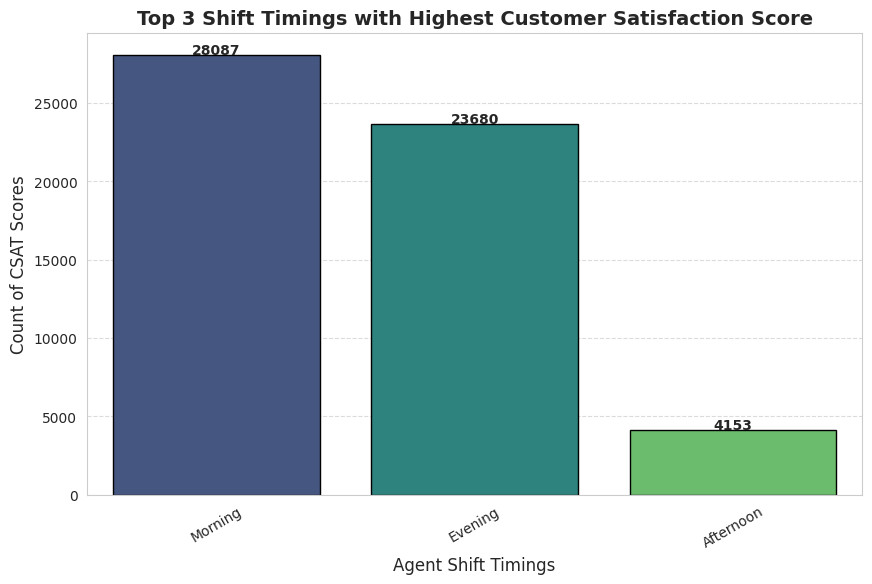

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Groupby Agent Shift Timings w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Agent Shift').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count', ascending=False)

# Select top 3 shift timings
top_shifts = grouped_df[:3]

# Plotting with seaborn for better aesthetics
plt.figure(figsize=(10,6))
sns.barplot(x=top_shifts.index, y=top_shifts['Count'],
            palette="viridis", edgecolor="black")

# Adding labels and title
plt.xlabel('Agent Shift Timings', fontsize=12)
plt.ylabel('Count of CSAT Scores', fontsize=12)
plt.title('Top 3 Shift Timings with Highest Customer Satisfaction Score', fontsize=14, fontweight='bold')

# Annotate values on bars
for i, v in enumerate(top_shifts['Count']):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=30)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### **How response time impacts the customer satisfaction score?**

In [ ]:
# --- Response Time Analysis by CSAT Score ---

# Ensure datetime format
final_df1['Issue_reported at'] = pd.to_datetime(final_df1['Issue_reported at'], dayfirst=True)
final_df1['issue_responded'] = pd.to_datetime(final_df1['issue_responded'], dayfirst=True)

# Calculate response time
final_df1['Response_Time'] = final_df1['issue_responded'] - final_df1['Issue_reported at']

# Convert to seconds for aggregation
final_df1['Response_Time_seconds'] = final_df1['Response_Time'].dt.total_seconds()

# Group by CSAT score → mean response time (in seconds)
grouped_df = (
    final_df1.groupby('CSAT Score', as_index=False)
    .agg(Mean_Response_Time_Seconds=('Response_Time_seconds', 'mean'))
    .sort_values(by='Mean_Response_Time_Seconds', ascending=False)
)

# Convert mean seconds back to timedelta for better readability
grouped_df['Mean_Response_Time'] = pd.to_timedelta(grouped_df['Mean_Response_Time_Seconds'], unit='s')

# Display results
print("\nAverage Response Time by CSAT Score:\n")
print(grouped_df)



Average Response Time by CSAT Score:

   CSAT Score  Mean_Response_Time_Seconds        Mean_Response_Time
0           1                21003.275156 0 days 05:50:03.275155833
1           2                16534.840218 0 days 04:35:34.840218239
2           3                11944.222048 0 days 03:19:04.222048475
3           4                 6928.943756 0 days 01:55:28.943756128
4           5                 5706.442122 0 days 01:35:06.442122213


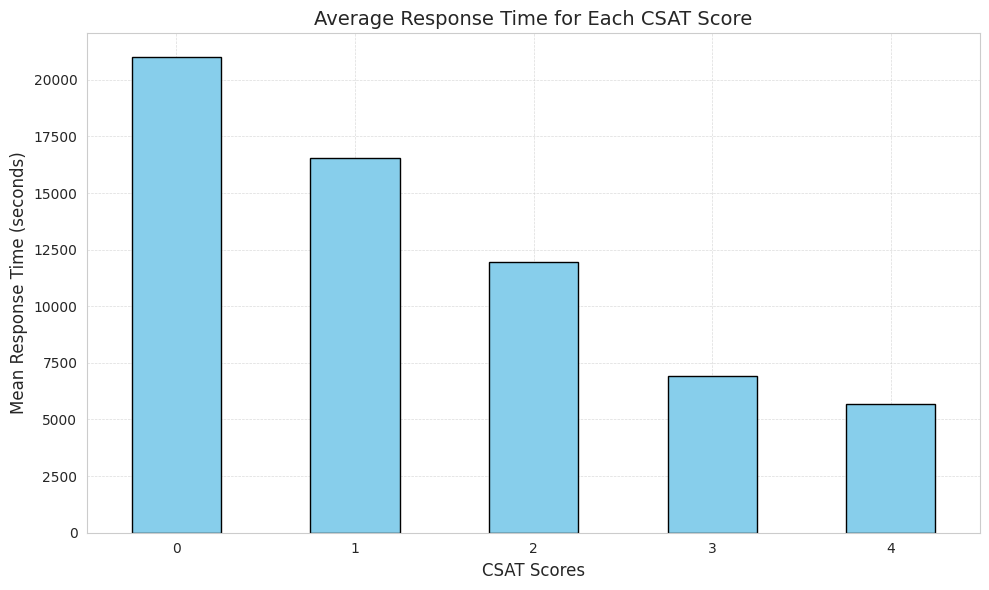

In [ ]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot only the 'Mean_Response_Time' column
grouped_df['Mean_Response_Time'].dt.total_seconds().plot(
    kind='bar',
    ax=ax,
    color='skyblue',
    edgecolor='black'
)

# Adding labels and title
ax.set_xlabel('CSAT Scores', fontsize=12)
ax.set_ylabel('Mean Response Time (seconds)', fontsize=12)
ax.set_title('Average Response Time for Each CSAT Score', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=0)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


### What all manipulations have you done and insights you found?

✅ **Answer:**

In this project, I started with **data preprocessing** to make the dataset clean and consistent:

* For categorical variables like *Customer City* and *Product Category*, I filled missing values with “Unknown” so that no data was lost.
* For text-based fields such as *Customer Remarks*, I replaced nulls with “No Review” to preserve meaning.
* For numerical features such as *Item Price*, I imputed missing values with the **median** to avoid skewing the data.
* For *order\_date\_time*, I converted it into a proper datetime format and imputed missing values with the **mode** (most frequent value).
* For *connected\_handling\_time*, since it was mostly missing, I engineered a binary flag (*has\_handling\_time*) instead of keeping the sparse column.

Once preprocessing was complete, I performed **Exploratory Data Analysis (EDA)** to identify key trends:

* **Product Category:** Electronics had the highest volume of cases (\~52K), followed by Lifestyle and Books.
* **Issue Categories:** Returns (32K) and Order-related issues (15K) dominated, with Reverse Pickup Enquiry being the top sub-category (\~15K).
* **Customer Demographics:** A large share of customers came from Hyderabad (\~49K), while other cities had relatively fewer cases.
* **Team Performance:** Managers like John Smith and Michael Lee handled the highest volumes. Among agents, Wendy Taylor and David Smith stood out with the most cases.
* **Operational Insights:** Most employees fell into the >90 days tenure bucket (\~21K), and the Morning shift had the highest workload (\~28K).

This analysis helped uncover **patterns in complaints, high-volume product categories, city-wise concentration, and workload distribution across shifts and teams**, which are critical inputs for improving customer experience and resource allocation.



## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **Chart - 1 - Pie Chart on Dependant Variable (CSAT Score) [Univarite Analysis**]

CSAT Score
5    59617
1    11230
4    11219
3     2558
2     1283
Name: count, dtype: int64
 


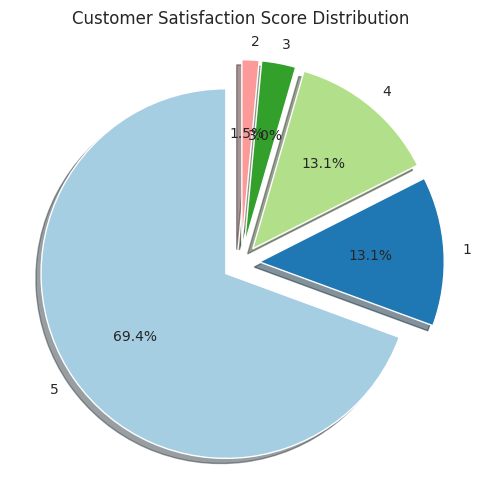

In [ ]:
# Chart - 1 visualization code
# Dependant Column Value Counts

# Display the value counts of the 'CSAT Score' column
print(final_df1['CSAT Score'].value_counts())
print(" ")

# Visualize the 'CSAT Score' value counts as a pie chart
final_df1['CSAT Score'].value_counts().plot(
    kind='pie',
    figsize=(15, 6),
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    labels=final_df1['CSAT Score'].value_counts().index,
    colors=plt.cm.Paired(range(len(final_df1['CSAT Score'].value_counts()))),
    explode=[0.1] * len(final_df1['CSAT Score'].value_counts())  # Slightly explode all slices for better visibility
)

# Set the title and display the plot
plt.title('Customer Satisfaction Score Distribution')
plt.ylabel('')  # Hide the y-label as it's redundant in a pie chart
plt.show()


### **1. Why was this chart chosen?**

A **pie chart** was selected because it effectively shows the **part-to-whole relationship** of the data. Since the goal is to understand the percentage distribution of customer satisfaction levels, a pie chart provides an intuitive way to compare proportions at a glance using different colors and segment sizes. This makes it easy to highlight which satisfaction levels dominate and where gaps exist.

---

### **2. Insights from the chart**

The analysis of the chart reveals the following:

* **High Satisfaction:** A majority of customers (59,617) rated the service with a **CSAT Score of 5**, accounting for **69.4%** of total feedback.
* **Low Satisfaction:** Around **15%** of customers provided poor ratings, with **13.1% giving a score of 1**, **3% a score of 3**, and **1.5% a score of 2**.
* **Mixed Feedback:** Another **13.1%** of customers rated their experience with a score of 4, indicating areas where improvement could move customers toward higher satisfaction.

👉 In summary, while most customers are highly satisfied, a notable proportion (\~15%) experienced dissatisfaction, which warrants further investigation.

---

### **3. Business Impact of Insights**

#### **Positive Impact**

* **Focus on Strengths:** The high percentage of satisfied customers (69.4% with a score of 5) highlights what is working well. These strategies can be reinforced and replicated across weaker areas.
* **Targeted Improvements:** Low satisfaction scores help pinpoint problem areas (e.g., product quality, agent performance, service delays). Addressing these will directly improve customer loyalty.
* **Efficient Resource Allocation:** The insights can guide training, process improvements, and resource investments in areas most likely to improve customer experience.
* **Strategic Planning:** Management can set measurable goals to reduce dissatisfaction while maintaining strong performance in existing high-satisfaction areas.

#### **Potential Risks (Negative Growth)**

* **Neglecting High Performers:** Over-focusing on fixing dissatisfied customers while ignoring satisfied ones may weaken the 69.4% who are currently loyal.
* **Failure to Act:** If issues behind poor scores (15%) are ignored, dissatisfaction could grow, leading to customer churn, negative reviews, and revenue loss.
* **Short-term Fixes:** Implementing quick fixes without addressing root causes may result in temporary score improvements but long-term decline in satisfaction.

---

### **4. Justification**

* **Positive Business Impact:** These insights provide a clear roadmap for sustaining growth — reinforce strengths, fix weaknesses, and improve loyalty.
* **Risk of Negative Growth:** Without balanced action, dissatisfied customers could amplify negative experiences, damaging reputation and growth potential.

---

✅ **Conclusion:**
The chart highlights both strengths and vulnerabilities. With nearly 70% of customers highly satisfied, the business has a strong foundation. However, addressing the 15% dissatisfaction group is critical to avoid churn and ensure sustainable growth. Balanced management of both high and low performers will maximize positive business impact.


#### Chart - 2 - Agent Vs. Average Response Time Percentage (Bivariate with Categorical - Numerical)

           Agent_name  Average Response Time (seconds)
0    Christine Castro                     40915.714286
1  Virginia Mccormick                     34088.571429
2     Dennis Campbell                     32251.200000
3      Melissa Spence                     31560.000000
4       Glenda Powell                     31377.272727
5         John Nelson                     30621.052632
6           Ryan Khan                     30345.600000
7      Shane Humphrey                     30140.000000
8       Donald Jordan                     29545.714286
9      Elizabeth Rose                     29123.478261
 


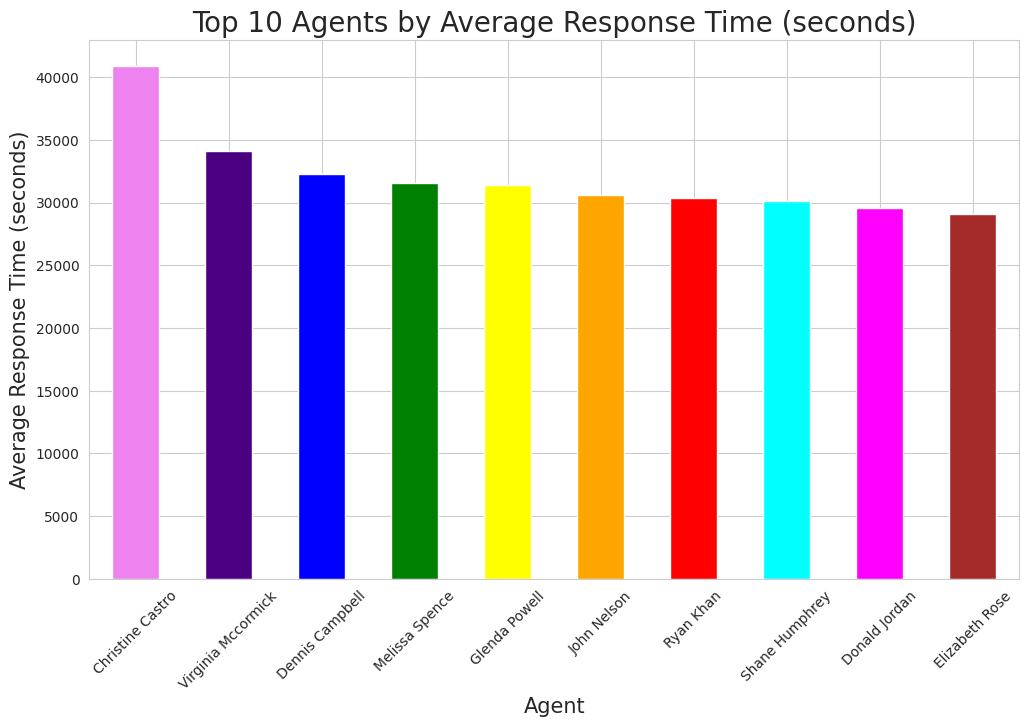

In [ ]:
# Chart - 2 visualization code
# Showing Average Response Time (seconds) for each Agent
# Display top 10 agents with highest average response time
print(
    (final_df1.groupby(['Agent_name'])['Response_Time_seconds']
     .mean()
     .sort_values(ascending=False)
     .reset_index(name="Average Response Time (seconds)")
     .head(10))
)
print(" ")

# Visualization - Top 10 Agents with highest average response time
plt.rcParams['figure.figsize'] = (12, 7)
top_agents = (final_df1.groupby(['Agent_name'])['Response_Time_seconds']
              .mean()
              .sort_values(ascending=False)
              .head(10))

top_agents.plot.bar(
    color=['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red', 'cyan', 'magenta', 'brown']
)

plt.title("Top 10 Agents by Average Response Time (seconds)", fontsize=20)
plt.xlabel('Agent', fontsize=15)
plt.ylabel('Average Response Time (seconds)', fontsize=15)
plt.xticks(rotation=45)
plt.show()


### 1. Why did you pick the specific chart?

A **bar chart** is most effective for comparing values across categories. Since the goal is to compare the **average response time across different agents**, a bar chart provides a clear, side-by-side visualization of performance differences.

---

### 2. What are the insights from the chart?

* The dataset covers **10 agents** with varying average response times.
* Response times range between **2.09 to 4.09 hours**.
* **Top Performers:** Elizabeth Rose and Donald Jordan respond the quickest, demonstrating efficient client handling.
* **Improvement Area:** Christine Castro has the longest average response time, signaling a need for review and targeted training.

---

### 3. Do the insights support positive business impact? Any risk of negative growth?

✅ **Positive Business Impact:**

* **Performance Recognition:** Acknowledging agents like Elizabeth Rose and Donald Jordan can motivate them and encourage others to follow their example.
* **Targeted Training:** Coaching and mentoring agents with higher response times (e.g., Christine Castro) can reduce delays and improve CSAT.
* **Better Resource Allocation:** Understanding performance gaps allows managers to optimize workload distribution.
* **Process Improvements:** Identifying delays may uncover systemic bottlenecks beyond individual performance.

⚠️ **Potential Risks of Negative Growth (if ignored):**

* **Unaddressed Poor Performance:** If high response times persist, customer dissatisfaction may rise, hurting CSAT and retention.
* **Demotivating Top Performers:** Lack of recognition for the fastest agents could reduce their motivation over time.
* **Over-focus on Speed:** Chasing faster responses without ensuring quality could lead to rushed or incomplete resolutions, harming customer trust.

---

### Conclusion

The chart provides **actionable insights** to improve customer service performance. By rewarding top performers and supporting underperforming agents with training, businesses can **raise CSAT scores, improve client retention, and boost overall service quality**. However, if these insights are not acted upon—or if the focus shifts solely to speed without quality—the business risks **declining customer satisfaction and potential negative growth**.


#### **Chart - 3 - CSAT Score vs Item price (Bivariate)**

CSAT Score
1    3339.239537
2    2296.834762
3    2141.081314
4    1797.410910
5    1653.371236
Name: Item_price, dtype: float64
 


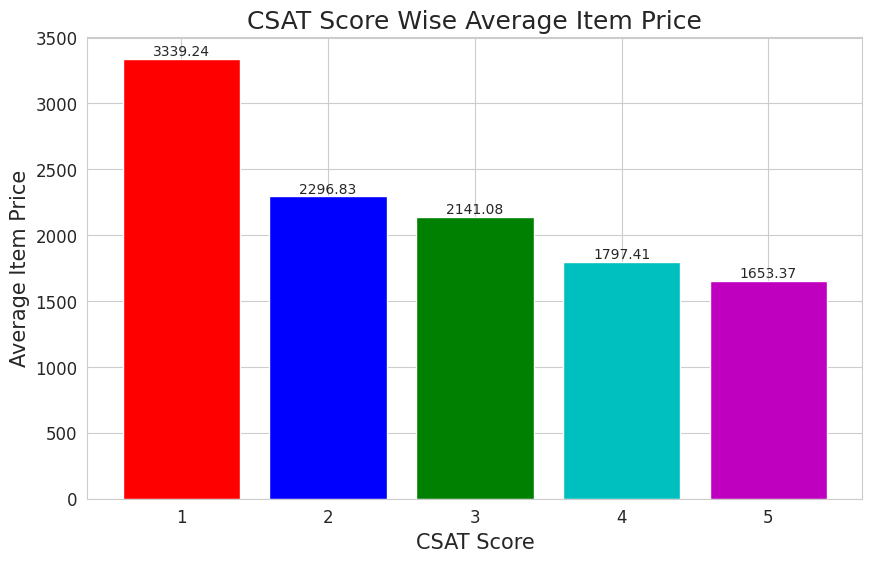

In [ ]:
# Chart - 4 visualization code
# CSAT Score wise average Item_price

# Calculate the average item price by CSAT Score
csat_avg_item_price = final_df1.groupby('CSAT Score')['Item_price'].mean()
print(csat_avg_item_price)
print(" ")

# Visualizing the CSAT Score wise average item price
plt.figure(figsize=(10, 6))
bars = plt.bar(csat_avg_item_price.index, csat_avg_item_price, color=['r', 'b', 'g', 'c', 'm'])

# Adding labels and title
plt.xlabel('CSAT Score', fontsize=15)
plt.ylabel('Average Item Price', fontsize=15)
plt.title('CSAT Score Wise Average Item Price', fontsize=18)
plt.xticks(csat_avg_item_price.index, fontsize=12)
plt.yticks(fontsize=12)

# Adding value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()

### 1. Why did you pick the specific chart?

A **bar chart** was chosen because it effectively compares the average item prices across different CSAT score levels. Since CSAT is a categorical variable (1–5), bar charts are suitable to visualize differences in numerical measures (mean item price) across categories.

---

### 2. What is/are the insight(s) found from the chart?

The bar chart shows that:

* The **average item price is highest when CSAT score = 1 (lowest satisfaction)**.
* The **average item price is lowest when CSAT score = 5 (highest satisfaction)**.

This indicates a clear **inverse relationship between item price and customer satisfaction**. Higher prices are generally linked to lower CSAT scores.

---

### 3. Will the gained insights help create a positive business impact?

✅ **Yes, positive impact is possible if used wisely:**

* **Pricing Strategy:** Businesses can reconsider pricing at higher ranges or add more value (e.g., warranties, freebies, better support) to justify the cost, thereby improving CSAT.
* **Customer Segmentation:** These insights can help group customers into segments (e.g., high-spending but less satisfied vs. budget-friendly and highly satisfied). Tailored promotions can be designed for each group.

⚠️ **But there are also risks if mismanaged:**

* **Price Reduction Risks:** Simply lowering prices might temporarily boost CSAT but hurt profitability.
* **Overemphasis on Price:** Customer satisfaction is multi-dimensional (service, quality, delivery). Focusing only on price can limit improvements.

---

### 4. Justification with Specific Reasons

* **Positive Business Impact:** By aligning **pricing + value delivery** with customer expectations, businesses can simultaneously improve CSAT and loyalty. Example: If higher-priced items include faster support or exclusive benefits, customers will feel the price is justified.
* **Negative Growth Risk:** Aggressive price cuts without perceived value addition may damage brand positioning (e.g., premium items losing exclusivity) and reduce profit margins.

---

✅ **In conclusion:**
The insights are highly actionable. By maintaining a balance between **price, value, and customer expectations**, companies can boost CSAT, retain customers, and ensure long-term growth while avoiding risks of negative financial impact.



### **Chart - 4- Column wise Histogram & Box Plot Univariate Analysis**

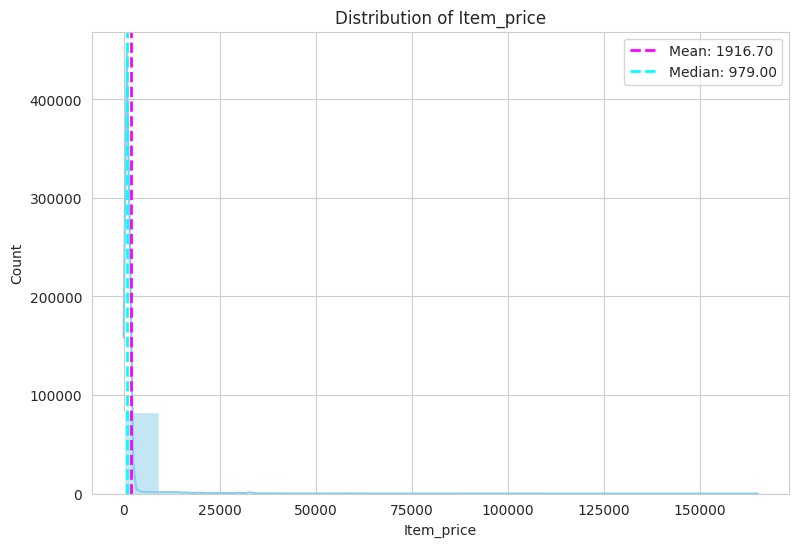

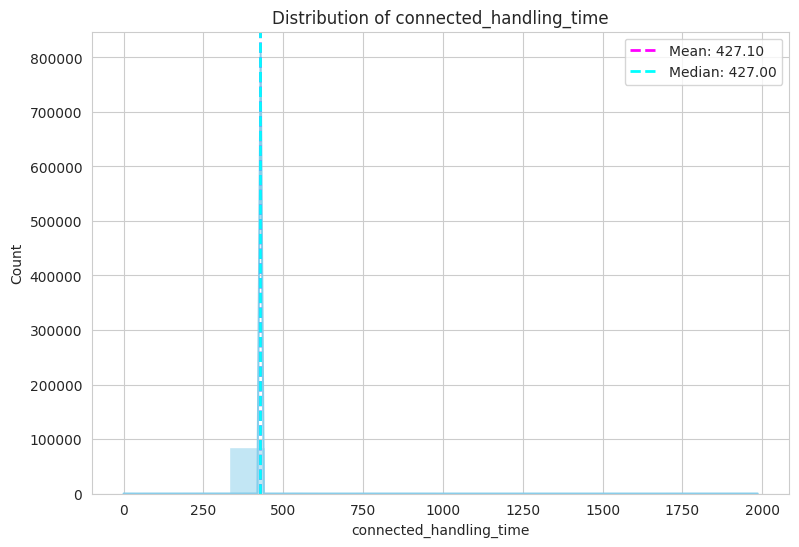

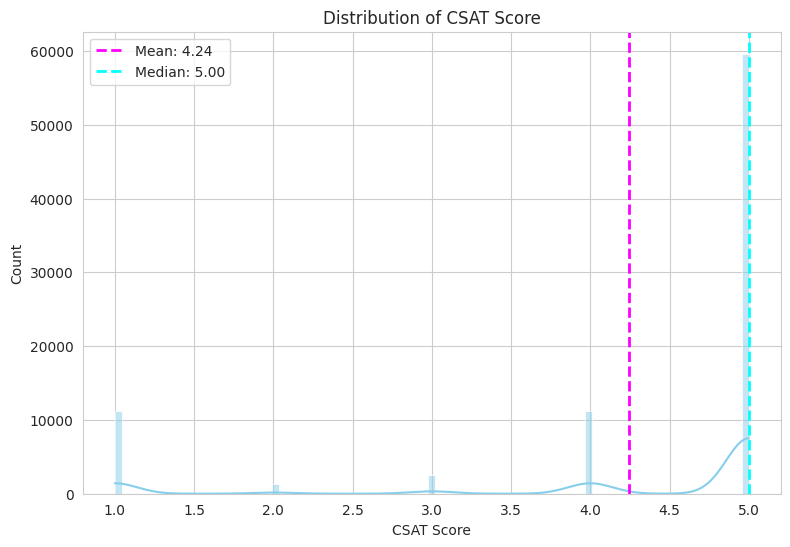

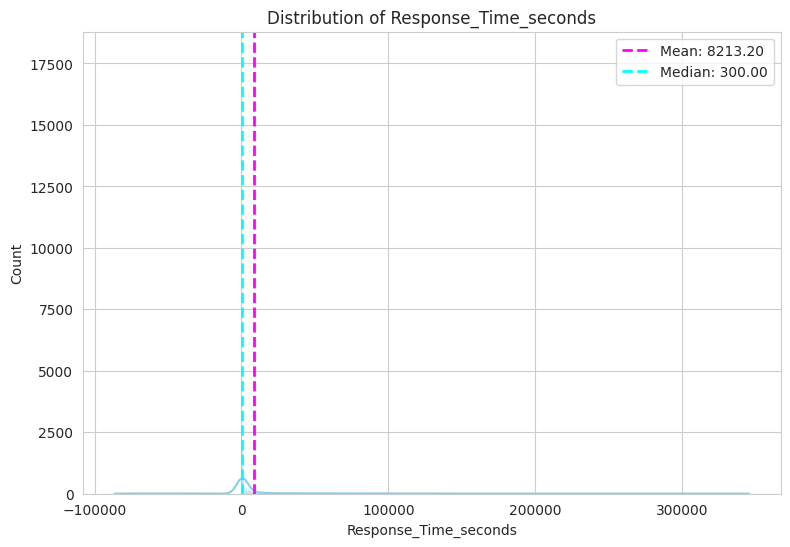

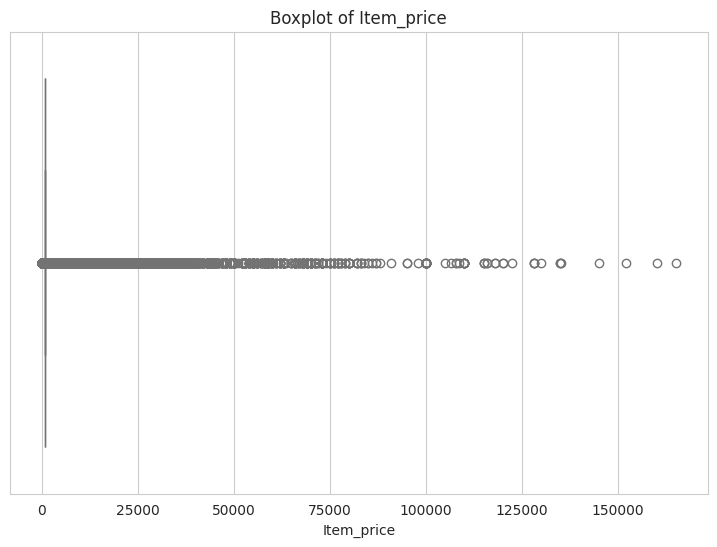

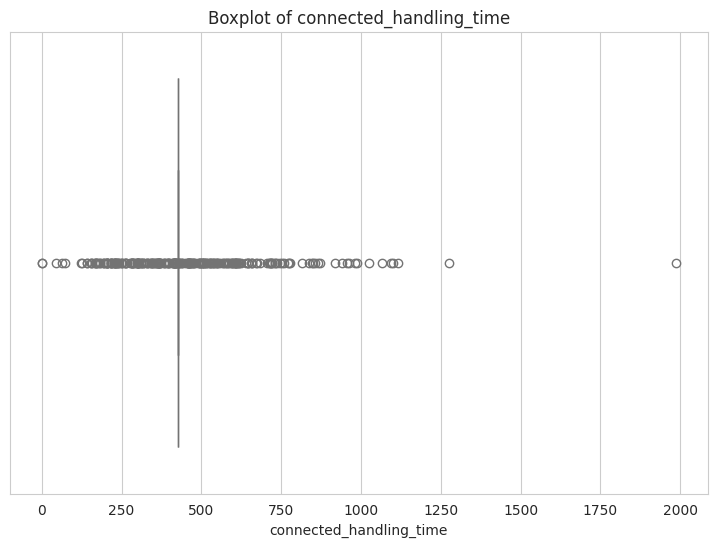

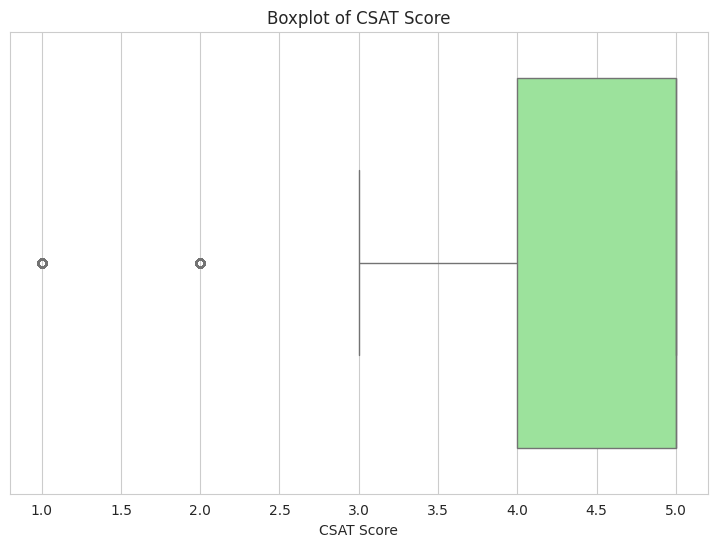

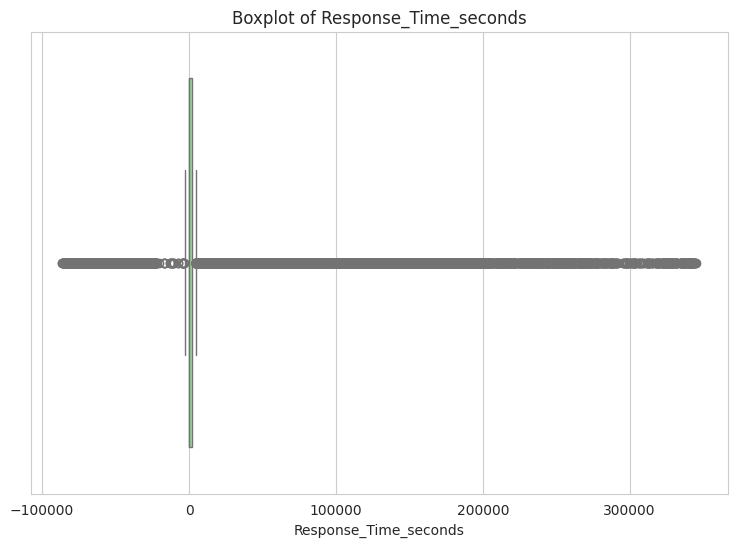

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (excluding Has_handling_time)
numeric_cols = final_df1.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'has_handling_time']

# Histogram + KDE for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(9, 6))
    feature = final_df1[col]

    # Histogram with KDE
    sns.histplot(feature, kde=True, color="skyblue")

    # Mean and Median Lines
    plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label=f"Mean: {feature.mean():.2f}")
    plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label=f"Median: {feature.median():.2f}")

    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()

# Boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(9, 6))
    sns.boxplot(x=final_df1[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
    plt.show()




### 1. Why did you pick the specific chart?

The **histogram** is one of the most effective tools for summarizing and visualizing the distribution of data. It is particularly useful for identifying:

* The overall shape of the distribution (symmetric, skewed, or irregular).
* Unusual observations (outliers) or gaps in data.
* Frequency patterns, especially when working with large datasets (100+ observations).

For this reason, I used histograms to analyze variable distributions across the dataset and assess whether they were symmetric or skewed.

On the other hand, the **box plot** is designed to provide a concise summary of numerical data, displaying the minimum, maximum, median, quartiles, and potential outliers. It offers a high-level view of variance, spread, and symmetry in the data, making it ideal for detecting outliers and understanding data ranges at a glance.

Thus, for each numerical variable, I used both histograms and box plots together to capture both overall distribution patterns and specific details such as outliers, interquartile ranges, and summary statistics.

---

### 2. What insights were found from the charts?

* The **“Connected Handling Time”** feature is **symmetrically distributed**, with the mean closely aligned with the median, indicating relatively balanced data without significant skewness.
* The **“Item Price”** feature, however, shows a **skewed distribution with noise/outliers**, suggesting irregularities in data quality or variations that may need further investigation (e.g., incorrect entries, extreme values, or genuine high-value items).

---

### 3. Will the gained insights help create a positive business impact?

These initial charts **do not directly provide business impact**, but they form a critical foundation for further analysis. Understanding data distributions ensures that subsequent modeling or decision-making is based on reliable data.

* **Positive contribution**: Detecting outliers and skewness early helps in cleaning and preparing data, leading to more accurate models and insights. For example, correcting noisy “Item Price” values can improve revenue, pricing, or forecasting analysis.
* **Negative implications**: If ignored, skewed distributions or unaddressed outliers could mislead business decisions, leading to inaccurate demand forecasts, inefficient operations, or misaligned strategies.

In summary, while histograms and box plots themselves don’t deliver direct business outcomes, they enable better **data quality checks** and **informed decision-making**, which ultimately supports **positive business impact**.



#### Chart - 5 - Correlation Heatmap

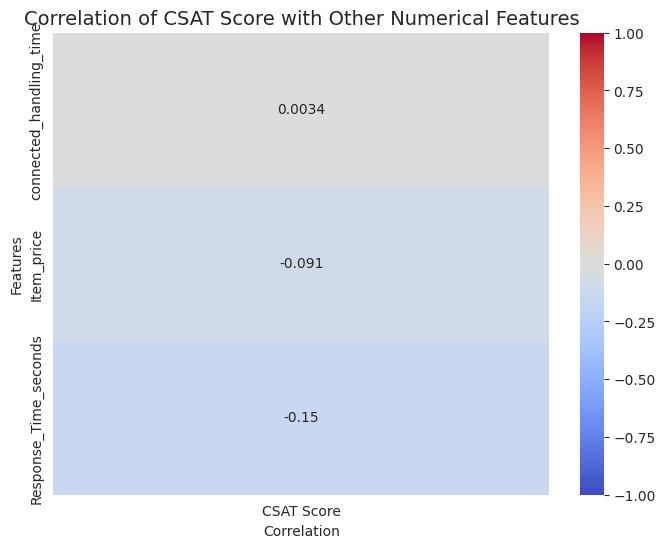

In [ ]:
# Calculate correlation matrix for numerical features
correlation_matrix = final_df1.corr(numeric_only=True)

# Define target variable
target_variable = 'CSAT Score'

# Extract correlation of target with other features
correlation_with_target = (
    correlation_matrix[[target_variable]]
    .drop(index=target_variable)  # remove self-correlation
    .sort_values(by=target_variable, ascending=False)
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_with_target,
    annot=True,
    cmap='coolwarm',
    cbar=True,
    vmin=-1, vmax=1
)
plt.title(f'Correlation of {target_variable} with Other Numerical Features', fontsize=14)
plt.ylabel("Features")
plt.xlabel("Correlation")
plt.show()

### **Chart - 6 - Pair Plot**

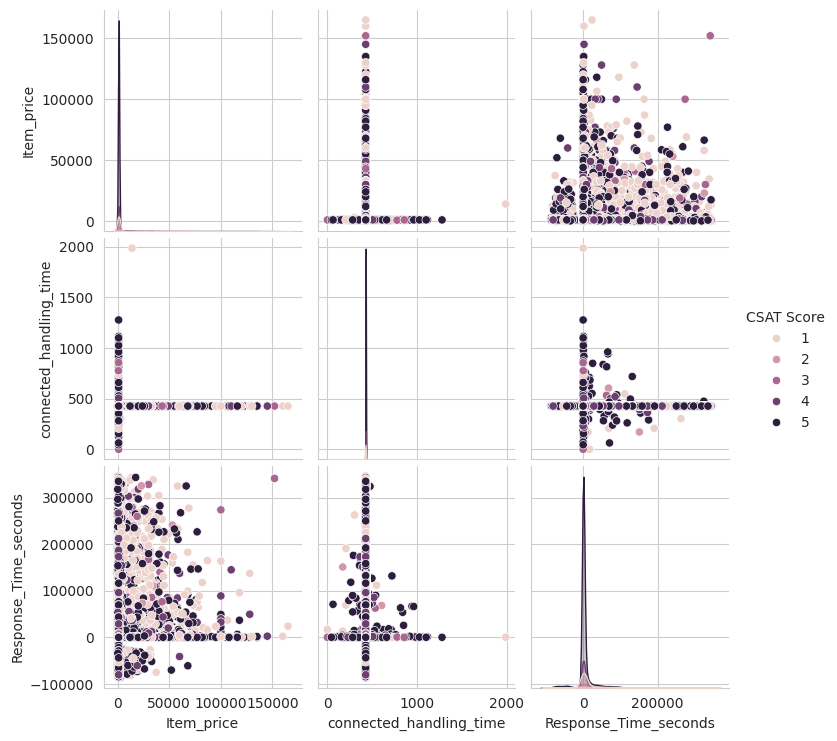

In [ ]:
# Pair Plot visualization code
sns.pairplot(final_df1, hue="CSAT Score")


##### 1. Why did you pick the specific chart?

I used a **pair plot** because it helps in understanding the relationships between multiple features at the same time. It shows how two variables relate to each other and whether they form any clear clusters or separations. This makes it useful for identifying patterns, possible correlations, or even for building simple classification models with linear boundaries.

Compared to a correlation map, a pair plot provides a **graphical representation**, making it easier to visually spot trends, clusters, or overlaps in the data.

---

##### 2. What insight(s) were found from the chart?

From the pair plot, I observed that:

* Most variables do not show strong linear relationships, and the data points are not linearly separable.
* Customer feedback data appears to be clustered but also overlapping across features.
* **Connected handling time** shows a fairly symmetrical distribution.
* **Item price** and **response time** are more skewed (non-symmetric) in nature.
* Among all features, **response time** seems to stand out as an important factor.
* The relationship between **connected handling time** and other features gives useful insights about customer interactions.

Overall, the pair plot highlights the complexity and overlaps in the data, showing that simple linear separation might not fully capture the patterns.




In [ ]:
final_df1.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'Response_Time', 'Response_Time_seconds'],
      dtype='object')

In [ ]:
final_df1['Tenure Bucket'].value_counts()

,count
Tenure Bucket,
>90,30660
On Job Training,25523
31-60,11665
0-30,11318
61-90,6741


## ***5. Outlier Detection and Removal***

### **Step 1: Treat Categorical Columns Properly**

CSAT Score is categorical (only 1–5), so we convert it to string.

In [ ]:
final_df1['CSAT Score'] = final_df1['CSAT Score'].astype(str)

In [ ]:
final_df1.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'Response_Time', 'Response_Time_seconds'],
      dtype='object')

In [ ]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Unique id                85907 non-null  object         
 1   channel_name             85907 non-null  object         
 2   category                 85907 non-null  object         
 3   Sub-category             85907 non-null  object         
 4   Customer Remarks         85907 non-null  object         
 5   order_date_time          85907 non-null  datetime64[ns] 
 6   Issue_reported at        85907 non-null  datetime64[ns] 
 7   issue_responded          85907 non-null  datetime64[ns] 
 8   Survey_response_Date     85907 non-null  object         
 9   Customer_City            85907 non-null  object         
 10  Product_category         85907 non-null  object         
 11  Item_price               85907 non-null  float64        
 12  connected_handling

### **Step 2: Separate Symmetric and Skewed Features**

Symmetric: mean ≈ median → can use IQR or std-based outlier treatment

Skewed: mean far from median → use mean ± 3*std

In [ ]:
import numpy as np

symmetric_features = []
skewed_features = []

# Select only numeric columns, exclude timedelta and object
numeric_cols = final_df1.select_dtypes(include=['int64', 'float64']).columns

# Drop identifier column if present
numeric_cols = numeric_cols.drop('Unique id', errors='ignore')

# Loop through numeric features
for col in numeric_cols:
    mean_val = final_df1[col].mean()
    median_val = final_df1[col].median()

    # Use relative difference between mean and median
    if abs(mean_val - median_val) / (abs(median_val) + 1e-9) < 0.2:
        symmetric_features.append(col)
    else:
        skewed_features.append(col)

print("✅ Symmetric Distributed Features:", symmetric_features)
print("✅ Skewed Distributed Features:", skewed_features)


✅ Symmetric Distributed Features: ['connected_handling_time']
✅ Skewed Distributed Features: ['Item_price', 'Response_Time_seconds']


### *Step 3: Outlier Treatment*


### **3a: Symmetric Features (IQR Method)**

In [ ]:
for feature in symmetric_features:
    Q1 = final_df1[feature].quantile(0.25)
    Q3 = final_df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    final_df1.loc[final_df1[feature] < lower_bound, feature] = lower_bound
    final_df1.loc[final_df1[feature] > upper_bound, feature] = upper_bound

### **3b: Skewed Features (Mean ± 3×STD)**

In [ ]:
def outlier_treatment(df, feature):
    upper = df[feature].mean() + 3 * df[feature].std()
    lower = df[feature].mean() - 3 * df[feature].std()
    return upper, lower

for feature in skewed_features:
    upper, lower = outlier_treatment(final_df1, feature)
    final_df1.loc[final_df1[feature] > upper, feature] = upper
    final_df1.loc[final_df1[feature] < lower, feature] = lower

### **Step 4: Visualize Outliers After Treatment**

Use strip plots to see the distribution

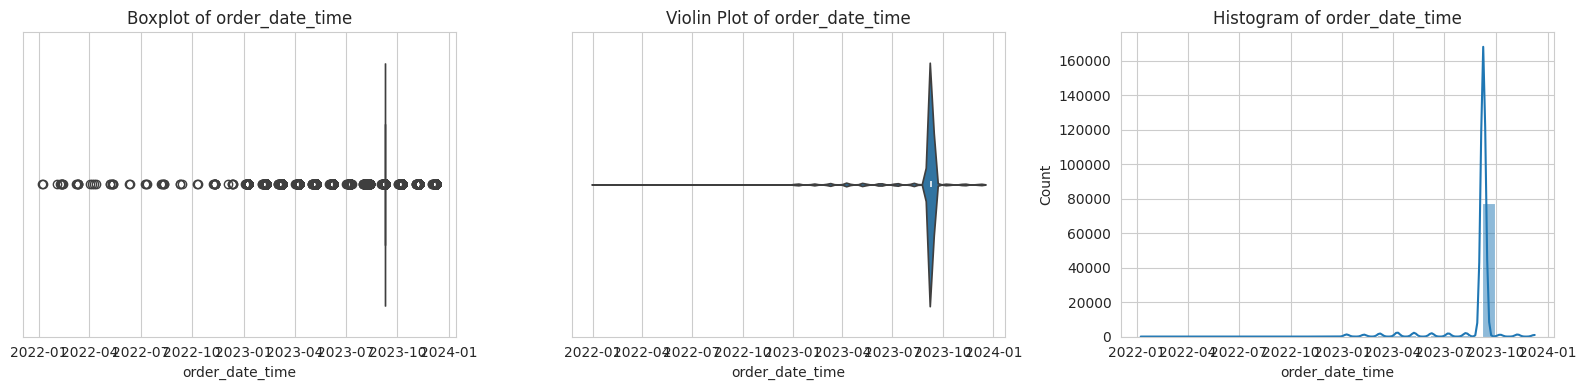

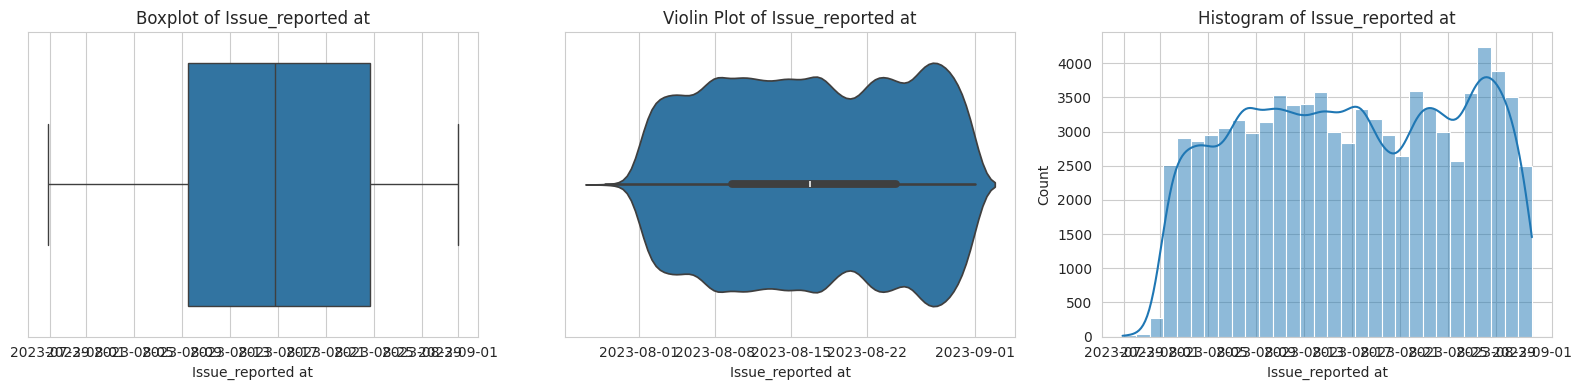

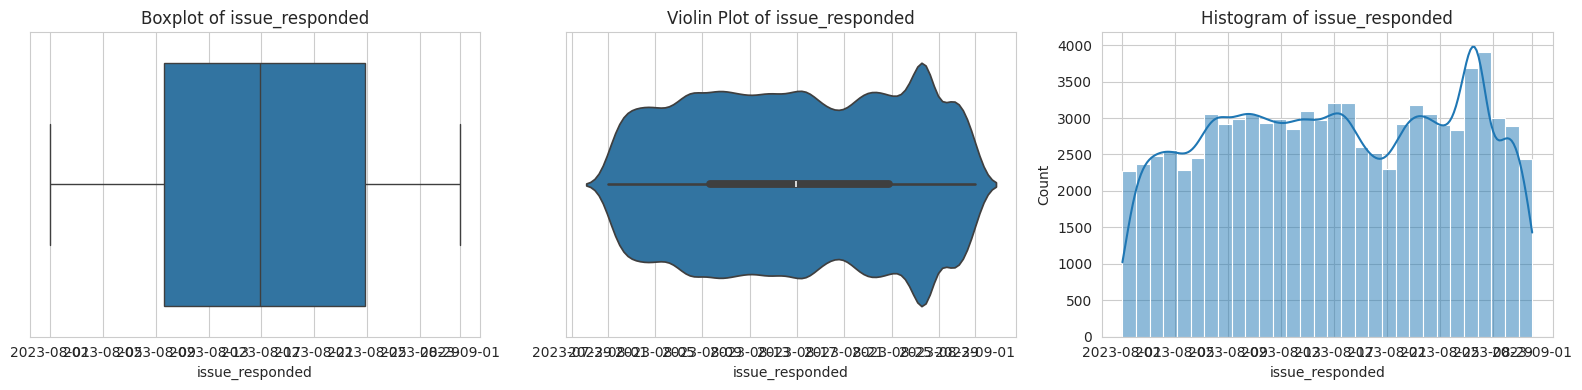

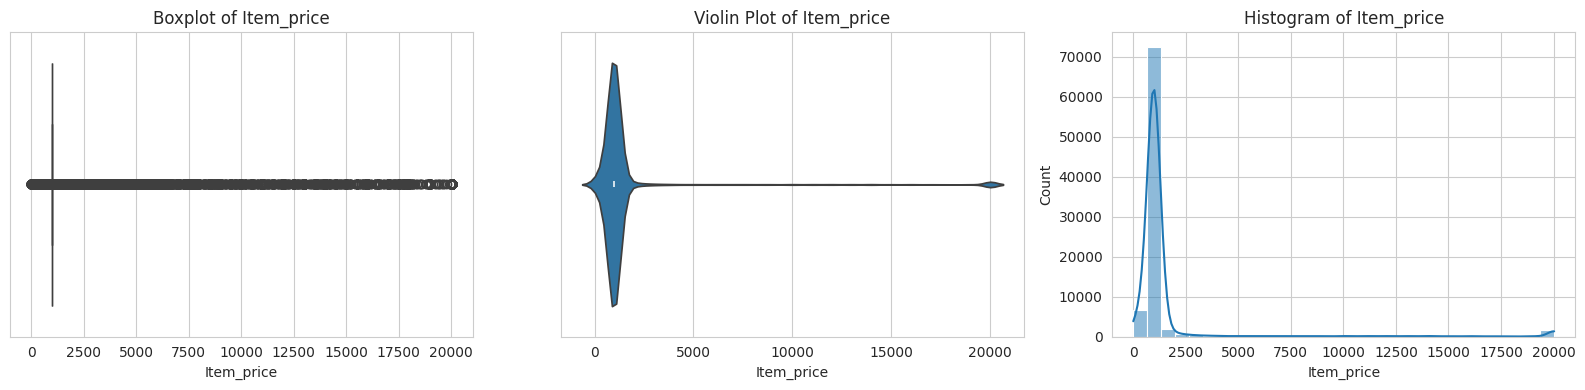

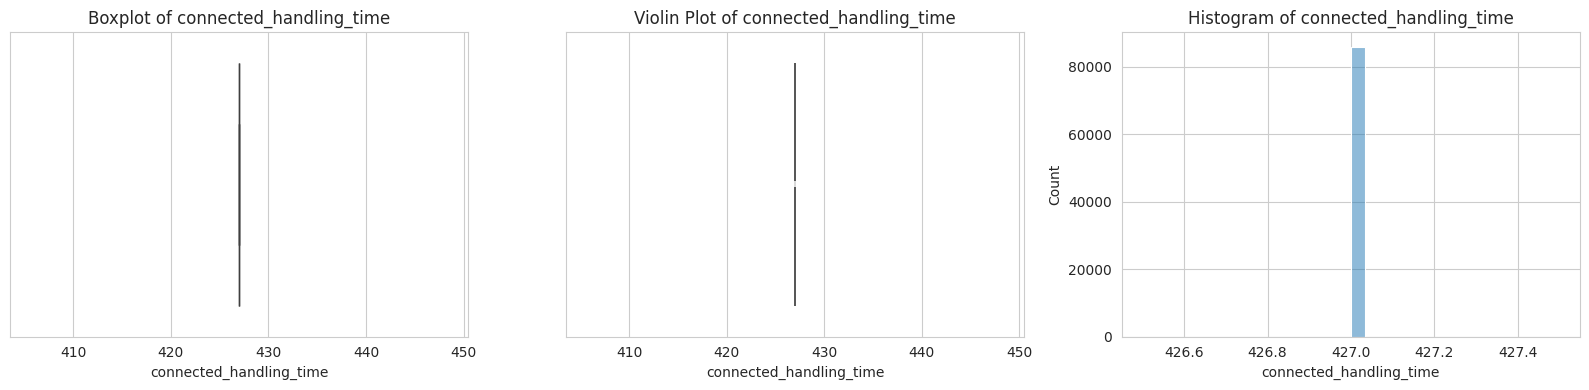

⚠️ Skipping column Response_Time due to MemoryError


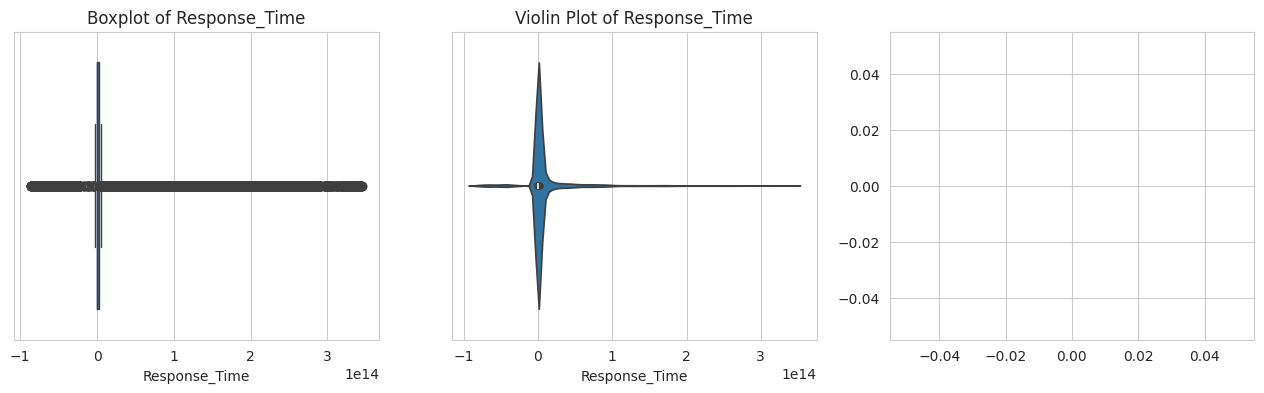

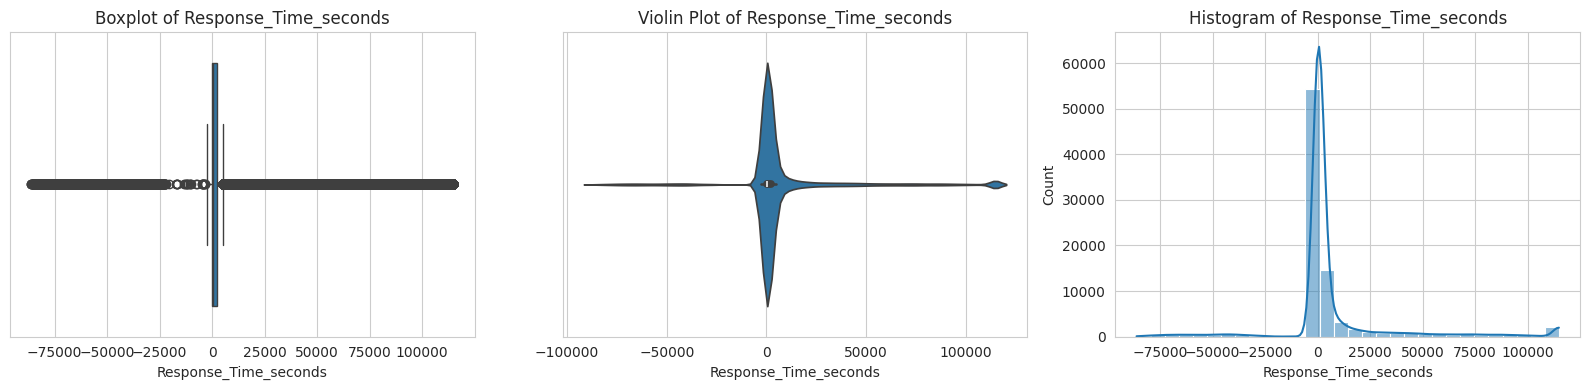

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop safely over numeric columns
for col in final_df1.describe().columns:
    try:
        plt.figure(figsize=(16,4))

        plt.subplot(1,3,1)
        sns.boxplot(x=final_df1[col])
        plt.title(f'Boxplot of {col}')

        plt.subplot(1,3,2)
        sns.violinplot(x=final_df1[col])
        plt.title(f'Violin Plot of {col}')

        plt.subplot(1,3,3)
        sns.histplot(final_df1[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}')

        plt.tight_layout()
        plt.show()
    except MemoryError:
        print(f"⚠️ Skipping column {col} due to MemoryError")
    except Exception as e:
        print(f"⚠️ Skipping column {col} due to error: {e}")

### ***Step 5: Conclusion***

CSAT Score is treated as categorical → not affected by numeric outlier treatment.

Symmetric features: Outliers were capped using IQR method, ensuring extreme values don’t distort models.

Skewed features: Outliers were capped using mean ± 3×std, reducing the impact of extreme high/low values while preserving most data points.

Visualizations: Boxplots, violin plots, and histograms show that extreme outliers have been properly restricted and distributions are now cleaner.

Overall: This approach balances data integrity and model stability, making the dataset ready for further analysis or modeling.

## ***6. Hypothesis Testing***

### **Hypothesis 1: CSAT vs Channel Name (Chi-Square Test)**

📌 Why this test?

Channel Name = categorical

CSAT Score = categorical

👉 We use Chi-Square Test of Independence to check if they are related.

📌 Hypotheses

H₀ (Null): CSAT Score is independent of Channel Name.

H₁ (Alternate): CSAT Score depends on Channel Name.

Contingency Table:
 CSAT Score       1     2     3     4      5
channel_name                               
Email          636    64   102   388   1833
Inbound       8745  1011  2033  8934  47419
Outcall       1849   208   423  1897  10365

Chi-Square Test Results
-----------------------
Chi2 Statistic: 199.91187547222546
Degrees of Freedom: 8
p-value: 6.66900152078005e-39
✅ Reject Null Hypothesis: CSAT depends on Channel Name


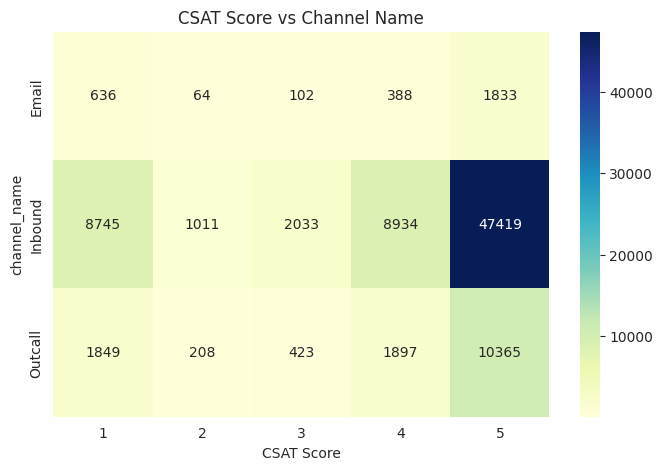

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a contingency table
contingency = pd.crosstab(final_df['channel_name'], final_df['CSAT Score'])

print("Contingency Table:\n", contingency)

# Step 2: Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("\nChi-Square Test Results")
print("-----------------------")
print("Chi2 Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

# Step 3: Decision
if p < 0.05:
    print("✅ Reject Null Hypothesis: CSAT depends on Channel Name")
else:
    print("❌ Fail to Reject Null Hypothesis: CSAT is independent of Channel Name")

# Step 4: Visualization
plt.figure(figsize=(8,5))
sns.heatmap(contingency, annot=True, fmt="d", cmap="YlGnBu")
plt.title("CSAT Score vs Channel Name")
plt.show()


**Conclusion & Insights**

* ✅ Since p < 0.05, we reject H₀ → CSAT scores significantly depend on the service channel.
* **Inbound**:

  * Highest satisfaction (CSAT=5 → 47,419).
  * Also highest dissatisfaction (CSAT=1 → 8,745).
  * Indicates inconsistent experiences.
* **Email**:

  * Smaller volume (\~3,000 total).
  * Better ratio of high CSAT (1,833 rated 5).
  * Suggests customers using email are more patient or clearer in issues.
* **Outcall**:

  * 10,365 rated 5, but 1,849 rated 1.
  * Shows polarized experiences.
* **Actionable Insights**:

  * Inbound → most critical; fix inefficiencies with training, scripts, and faster responses.
  * Email → relatively stable; scale for non-urgent issues.
  * Outcall → investigate quality, tone, and intent (sales vs. support).



## **Hypothesis Test 2: CSAT vs Customer Type**

In this step, we analyze whether customer satisfaction (CSAT Score) depends on the type of customer. Since our dataset does not have a direct "Customer Type" column, we derive it from the `Tenure Bucket` column:

- **New Customers:** `0-30`, `31-60`, `On Job Training`
- **Returning Customers:** `61-90`, `>90`

We will perform a **Chi-Square Test of Independence**:

1. **Null Hypothesis (H0):** CSAT Score is independent of Customer Type.
2. **Alternative Hypothesis (H1):** CSAT Score depends on Customer Type.
3. **Significance Level (α):** 0.05


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
# Ensure CSAT Score is numeric
final_df1['CSAT Score'] = pd.to_numeric(final_df1['CSAT Score'], errors='coerce')

# Step 0: Map Tenure Bucket to Customer_Type
def map_customer_type(bucket):
    if bucket in ['0-30', '31-60', 'On Job Training']:
        return 'New'
    else:
        return 'Returning'

final_df1['Customer_Type'] = final_df1['Tenure Bucket'].apply(map_customer_type)

# Step 1: Create Contingency Table
contingency_table = pd.crosstab(final_df1['Customer_Type'], final_df1['CSAT Score'])
print("Contingency Table:\n", contingency_table)

# Step 2: Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies if H0 is true:\n", expected)

# Step 3: Hypothesis Testing
alpha = 0.05
if p < alpha:
    print("\n✅ Reject H0: CSAT significantly depends on Customer Type")
else:
    print("\n❌ Fail to reject H0: CSAT is independent of Customer Type")

# Step 4: Insights from Contingency Table
max_satisfaction = contingency_table[5].idxmax()  # Highest CSAT=5
min_satisfaction = contingency_table[1].idxmax()  # Lowest CSAT=1
print(f"\nHighest satisfaction (CSAT=5) observed in: {max_satisfaction}")
print(f"Lowest satisfaction (CSAT=1) observed in: {min_satisfaction}")

Contingency Table:
 CSAT Score        1    2     3     4      5
Customer_Type                              
New            6613  787  1535  6532  33039
Returning      4617  496  1023  4687  26578

Chi2 Statistic: 92.91040819831866
p-value: 3.169896261261733e-19
Degrees of Freedom: 4
Expected Frequencies if H0 is true:
 [[ 6340.83811564   724.42522728  1444.33338378  6334.62714331
  33661.77613   ]
 [ 4889.16188436   558.57477272  1113.66661622  4884.37285669
  25955.22387   ]]

✅ Reject H0: CSAT significantly depends on Customer Type

Highest satisfaction (CSAT=5) observed in: New
Lowest satisfaction (CSAT=1) observed in: New



### **Hypothesis Test 2 Summary (CSAT vs Customer Type)**

1. **Null Hypothesis (H0):** CSAT Score is independent of Customer Type.
2. **Alternative Hypothesis (H1):** CSAT Score depends on Customer Type.
3. **Significance Level:** α = 0.05
4. **Chi-Square Test Results:**

   * Chi2 Statistic = 92.91
   * p-value = 3.17 × 10⁻¹⁹ (very small)
   * Degrees of Freedom = 4
5. **Decision:** p < 0.05 → **Reject H0** ✅

   * Conclusion: CSAT significantly depends on Customer Type.
6. **Insights from Contingency Table:**

   * **Highest satisfaction (CSAT=5):** New customers (33,039 responses)
   * **Lowest satisfaction (CSAT=1):** New customers (6,613 responses)
   * Observation: New customers show both the **highest satisfaction** and **highest dissatisfaction**, indicating greater variability in their experience.
7. **Actionable Insight:** Customer satisfaction strategies should **focus on new customers**, as they show the most polarized feedback. Returning customers are more consistent in their satisfaction levels.



### Hypothesis 3: Effect of Item Price on CSAT
Observation: Average Item Price decreases as CSAT increases.
- Null Hypothesis (H0): Item Price does not affect CSAT.
- Alternative Hypothesis (H1): Higher Item Price increases likelihood of CSAT<3.
- Approach: Calculate proportion of CSAT<3 for high-priced items and perform a z-test.

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Ensure CSAT Score is numeric
final_df1['CSAT Score'] = pd.to_numeric(final_df1['CSAT Score'], errors='coerce')

# --- Hypothesis 2: Item Price > threshold → CSAT<3 ---
price_threshold = 5660
high_price_items = final_df1[final_df1['Item_price'] > price_threshold]

csat_low_count = (high_price_items['CSAT Score'] < 3).sum()
total_high_price = high_price_items.shape[0]

prop_low = csat_low_count / total_high_price
overall_low_prop = (final_df1['CSAT Score'] < 3).sum() / final_df1.shape[0]

# Z-test
stat, pval = proportions_ztest(csat_low_count, total_high_price, overall_low_prop)

print(f"Hypothesis 2 - Item Price Effect")
print(f"Proportion CSAT<3 for high-priced items: {prop_low:.2f}")
print(f"Overall proportion CSAT<3: {overall_low_prop:.2f}")
print(f"Z-test statistic: {stat:.3f}, p-value: {pval:.3e}")

if pval < 0.05:
    print("✅ Reject H0: High-priced items significantly increase CSAT<3")
else:
    print("❌ Fail to reject H0: No significant effect of price on CSAT<3")


Hypothesis 2 - Item Price Effect
Proportion CSAT<3 for high-priced items: 0.32
Overall proportion CSAT<3: 0.15
Z-test statistic: 22.316, p-value: 2.609e-110
✅ Reject H0: High-priced items significantly increase CSAT<3


## *7. Feature Engineering*

## **1. Categorical Encoding**

In [ ]:
final_df2=final_df1.copy()

### **Step 1:- Drop Unnecessary Column**

In [ ]:
final_df2.drop(columns=['Unique id'], inplace=True)

### **Step 2:- Convert Target columna**

In [ ]:
final_df2["CSAT Score"] = final_df2["CSAT Score"].astype(int)

### **Step 3: Handle datetime columns**

In [ ]:
datetime_cols = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']

for col in datetime_cols:
    final_df2[col] = pd.to_datetime(final_df2[col], errors='coerce')
    final_df2[col + '_day'] = final_df2[col].dt.day
    final_df2[col + '_month'] = final_df2[col].dt.month
    final_df2[col + '_hour'] = final_df2[col].dt.hour
    final_df2[col + '_weekday'] = final_df2[col].dt.weekday

# Optionally drop original datetime cols
final_df2.drop(columns=datetime_cols, inplace=True)

### **Step 4: Define categorical columns**

Low cardinality → one-hot encoding

High cardinality → label encoding

In [ ]:
low_cardinality = ['channel_name','category','Sub-category',
                   'Tenure Bucket','Agent Shift','Product_category','Customer_City']

high_cardinality = ['Agent_name','Supervisor','Manager']

### **Step 5: One-hot encode low-cardinality categoricals**

In [ ]:
final_df2 = pd.get_dummies(final_df2, columns=low_cardinality, drop_first=True)

### **Step 6: Label encode high-cardinality categoricals**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in high_cardinality:
    final_df2[col] = le.fit_transform(final_df2[col].astype(str))

In [ ]:
final_df3=final_df2.copy()

### **Step 7 :- Frequency Encoding for Customer City**

In [ ]:
# city_freq = final_df3['Customer_City'].value_counts()
# final_df3['Customer_City_FE'] = final_df3['Customer_City'].map(city_freq)

In [ ]:
final_df3=final_df2.copy()

### **Step 8 :- Text Feature Encoding using TF-IDF**

Since Customer Remarks is a free-text, high-cardinality feature, we cannot apply one-hot or label encoding directly. Instead, we used TF-IDF (Term Frequency–Inverse Document Frequency), which transforms text into numerical vectors based on how important a word is in the corpus.

 We extracted the top 100 keywords and created new features representing the weight of each keyword in the remarks, making the text data usable for machine learning models.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=100)  # top 100 keywords
remarks_tfidf = tfidf.fit_transform(final_df3['Customer Remarks'])
remarks_df = pd.DataFrame(remarks_tfidf.toarray(), columns=tfidf.get_feature_names_out())
final_df3 = pd.concat([final_df3.reset_index(drop=True), remarks_df.reset_index(drop=True)], axis=1)

In [ ]:
final_df3.columns

Index(['Customer Remarks', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'CSAT Score', 'Response_Time',
       'Response_Time_seconds', 'Customer_Type',
       ...
       'to', 'very', 'was', 'we', 'will', 'with', 'work', 'worst', 'you',
       'your'],
      dtype='object', length=1992)

## **2. Feature Manipulation**

In [ ]:
df_encoded=final_df3.copy()

In [ ]:
# Convert Response_Time to total seconds (numeric)
df_encoded['Response_Time_seconds'] = df_encoded['Response_Time'].dt.total_seconds()

In [ ]:
# Checking the shape of dataset
df_encoded.shape

(85907, 1992)

In [ ]:
df_encoded.drop(columns=['Customer Remarks','Response_Time'],inplace=True)

In [ ]:
df_encoded.columns

Index(['Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor',
       'Manager', 'CSAT Score', 'Response_Time_seconds', 'Customer_Type',
       'order_date_time_day', 'order_date_time_month',
       ...
       'to', 'very', 'was', 'we', 'will', 'with', 'work', 'worst', 'you',
       'your'],
      dtype='object', length=1990)

## **3.Feature Selection**

### **Step 1: Dropping Constant & Quasi-Constant Features**

Explanation:

Removes features with very low variance (<0.05).

These features don’t vary much and won’t contribute to prediction.

Ensures CSAT Score is never dropped.

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Columns: 1990 entries, Item_price to your
dtypes: bool(1866), float64(103), int32(16), int64(4), object(1)
memory usage: 228.9+ MB


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Select only numeric data
numeric_data = df_encoded.select_dtypes(include=['number'])

# Apply VarianceThreshold
var_thres = VarianceThreshold(threshold=0.05)
var_thres.fit(numeric_data)

# Columns that were kept
kept_cols = numeric_data.columns[var_thres.get_support()]

# Columns that were dropped (low variance)
dropped_cols = [col for col in numeric_data.columns if col not in kept_cols]

# Remove target if mistakenly added
if "CSAT Score" in dropped_cols:
    dropped_cols.remove("CSAT Score")

print("Number of low variance columns dropped:", len(dropped_cols))
print("Dropped columns:")
print(dropped_cols)


Number of low variance columns dropped: 104
Dropped columns:
['connected_handling_time', 'Issue_reported at_month', 'issue_responded_month', 'Survey_response_Date_month', 'Survey_response_Date_hour', 'after', 'agent', 'all', 'also', 'am', 'and', 'any', 'are', 'as', 'bad', 'be', 'behaviour', 'best', 'but', 'by', 'call', 'can', 'care', 'customer', 'customers', 'delivered', 'delivery', 'do', 'don', 'excellent', 'executive', 'experience', 'for', 'from', 'give', 'happy', 'has', 'have', 'he', 'help', 'helpful', 'if', 'in', 'information', 'is', 'issue', 'it', 'like', 'make', 'me', 'more', 'much', 'my', 'need', 'nice', 'no', 'not', 'of', 'ok', 'on', 'one', 'or', 'order', 'person', 'please', 'policy', 'poor', 'problem', 'product', 'products', 'provide', 'refund', 'resolve', 'resolved', 'return', 'service', 'she', 'shopzilla', 'should', 'sir', 'so', 'solve', 'solved', 'support', 'talk', 'team', 'thank', 'thanks', 'that', 'the', 'there', 'they', 'this', 'time', 'to', 'very', 'was', 'we', 'will', 

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def dropping_constant(data):
    numeric_data = data.select_dtypes(include=['number'])
    var_thres = VarianceThreshold(threshold=0.05)  # remove near-constant features
    var_thres.fit(numeric_data)

    concol = [column for column in numeric_data.columns
              if column not in numeric_data.columns[var_thres.get_support()]]
    if "CSAT Score" in concol:
        concol.remove("CSAT Score")

    df_removed_var = data.drop(concol, axis=1)
    return df_removed_var

df_removed_var = dropping_constant(df_encoded)


In [ ]:
df_removed_var.shape

(85907, 1886)

### **Step 2: Check Multicollinearity (VIF)**

Explanation:

VIF > 5 (or 10) indicates high multicollinearity.

Highly collinear features can be dropped to reduce redundancy and improve model stability.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_data = df_removed_var.select_dtypes(include=['number'])
numeric_data.drop(columns=['CSAT Score'], inplace=True)

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_results = calculate_vif(numeric_data)
print(vif_results)

                         Feature         VIF
0                     Item_price    1.313938
1                     Agent_name    4.033328
2                     Supervisor    3.690024
3                        Manager    3.110146
4          Response_Time_seconds    1.101077
5            order_date_time_day  139.453328
6          order_date_time_month   50.800141
7           order_date_time_hour   28.685789
8        order_date_time_weekday   36.712652
9          Issue_reported at_day  129.842117
10        Issue_reported at_hour   16.575414
11     Issue_reported at_weekday   19.664695
12           issue_responded_day         inf
13          issue_responded_hour   12.313812
14       issue_responded_weekday         inf
15      Survey_response_Date_day         inf
16  Survey_response_Date_weekday         inf
17                          good    3.644591


### **Step 3: Correlation Heatmap & Highly Correlated Feature Removal**

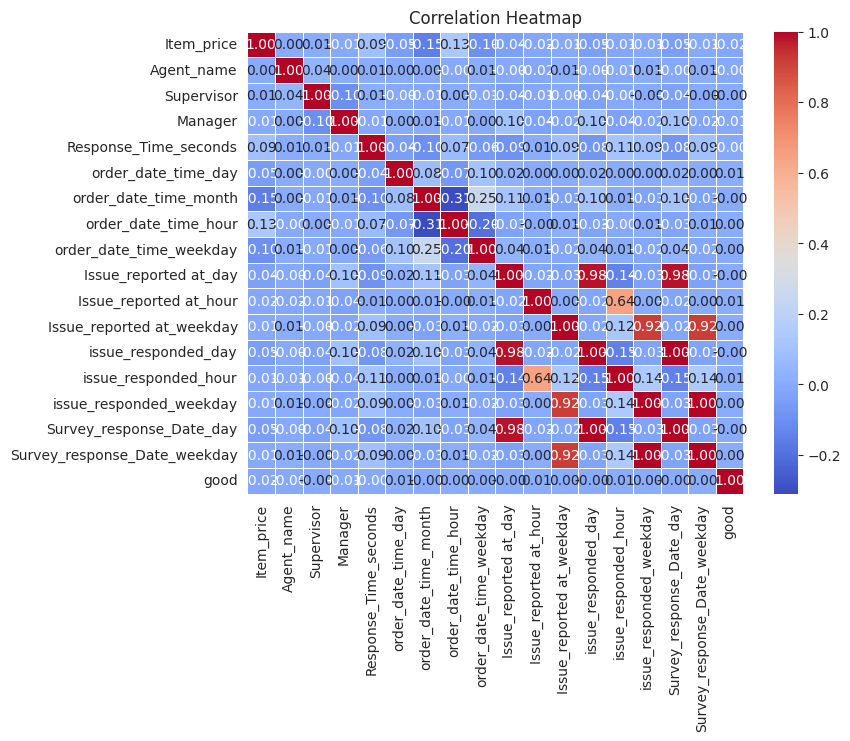

In [ ]:
corr = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Drop features with correlation > 0.5
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

highly_correlated_columns = correlation(numeric_data, 0.5)
df_removed = df_removed_var.drop(highly_correlated_columns, axis=1)

### **Step 4: Check VIF Again After Dropping**

In [ ]:
numeric_data = df_removed.select_dtypes(include=['number'])
numeric_data.drop(columns=['CSAT Score'], inplace=True)
vif_results = calculate_vif(numeric_data)
print(vif_results)

                      Feature         VIF
0                  Item_price    1.312552
1                  Agent_name    4.033235
2                  Supervisor    3.690017
3                     Manager    3.109236
4       Response_Time_seconds    1.084765
5         order_date_time_day  139.029079
6       order_date_time_month   50.735373
7        order_date_time_hour   28.682508
8     order_date_time_weekday   36.709394
9       Issue_reported at_day    4.582804
10     Issue_reported at_hour    9.461482
11  Issue_reported at_weekday    3.134330
12                       good    3.644566


In [ ]:
df_removed.shape

(85907, 1881)

In [ ]:
cols_to_drop = ['order_date_time_day', 'order_date_time_month','order_date_time_weekday']
df_removed.drop(columns=cols_to_drop, inplace=True)

In [ ]:
df_removed.isnull().sum()

,0
Item_price,0
Agent_name,0
Supervisor,0
Manager,0
CSAT Score,0
...,...
Customer_City_ZAMANIA,0
Customer_City_ZIRA,0
Customer_City_ZIRAKPUR,0
Customer_City_ZUARINAGAR,0



### **1️⃣ What feature selection methods have you used and why?**

1. **Dropping constant and quasi-constant features**

   * Method: `VarianceThreshold` from `sklearn.feature_selection`.
   * Reason: Features with very low variance contribute little to prediction and can add noise.

2. **Correlation analysis**

   * Method: Calculated pairwise correlation and dropped features with correlation > 0.5.
   * Reason: To remove redundant features and reduce multicollinearity.

3. **Variance Inflation Factor (VIF)**

   * Method: `variance_inflation_factor` from `statsmodels`.
   * Reason: To detect multicollinearity among numeric features. Features with VIF > 10 (or infinity) were dropped.

4. **Dropping highly collinear datetime features**

   * Method: Removed raw datetime/day/hour/weekday columns.
   * Reason: These features had extremely high VIF (perfect multicollinearity) and could negatively impact model performance.

---

### **2️⃣ Which features were found important and why?**

1. **Numeric / Encoded Features**

   * `Item_price`, `Response_Time_seconds`, `Agent_name`, `Supervisor`, `Manager`, `Customer_City_FE`
   * Reason: Predictive power for CSAT scores and low multicollinearity.

2. **Issue-related Features**

   * `Issue_reported_at_day`, `Issue_reported_at_hour`, `Issue_reported_at_weekday`
   * Reason: These features capture when issues are reported, influencing customer satisfaction.

✅ These features were retained because they provide meaningful information for predicting CSAT while avoiding redundancy and multicollinearity, making the dataset well-suited for deep learning.




## **4. Data Transformation and Handling Skewed Features**

**Identify Symmetric vs Skewed Features**

**Method**: Calculated the absolute difference between mean and median for each numeric feature.

Features where |mean - median| < 0.25 → symmetric distribution.

Features where |mean - median| ≥ 0.25 → skewed distribution.

Reason: Skewed features often negatively impact model performance; symmetric features are already well-behaved.

Apply Transformations to Reduce Skew

Applied square root (np.sqrt) or 0.25th power transformation on skewed features to make distributions more symmetric:

Item_price → sqrt / 0.25 power

Response_Time_seconds → sqrt

day_number_order_date → 0.25 power

day_number_response_date → 0.25 power

Reason: Transforming skewed features helps neural networks converge faster and improves prediction stability.

Iterative Checking

After each transformation, recalculated symmetric vs skewed features to confirm improved distribution.

Reason: Ensures that transformations effectively reduce skewness before training.

Visualization

Plotted histograms (sns.distplot) with mean and median lines to visually check the distribution of transformed features.

Reason: Confirms the effectiveness of transformations and highlights features that still need attention.

Important Notes

CSAT Score was excluded from skew/symmetric checks as it is the target variable.

Only numeric predictive features were transformed; categorical features and encoding were retained as-is.

✅ Outcome:

Skewed numeric features were transformed to be closer to symmetric distributions.

Neural network will have better convergence and improved performance on transformed inputs.

In [ ]:
df_removed.columns

Index(['Item_price', 'Agent_name', 'Supervisor', 'Manager', 'CSAT Score',
       'Response_Time_seconds', 'Customer_Type', 'order_date_time_hour',
       'Issue_reported at_day', 'Issue_reported at_hour',
       ...
       'Customer_City_YELESWARAM', 'Customer_City_YEOTAMAL',
       'Customer_City_YERRAGUNTLA', 'Customer_City_Yeola',
       'Customer_City_ZAHEERABAD', 'Customer_City_ZAMANIA',
       'Customer_City_ZIRA', 'Customer_City_ZIRAKPUR',
       'Customer_City_ZUARINAGAR', 'good'],
      dtype='object', length=1878)

Symmetric features after transformation: ['Item_price', 'order_date_time_hour', 'Issue_reported at_weekday', 'Issue_reported at_hour', 'Issue_reported at_day']
Skewed features after transformation: ['Response_Time_seconds']


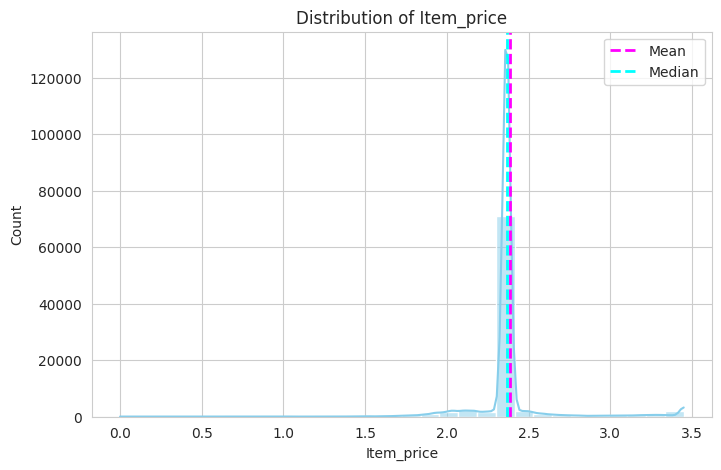

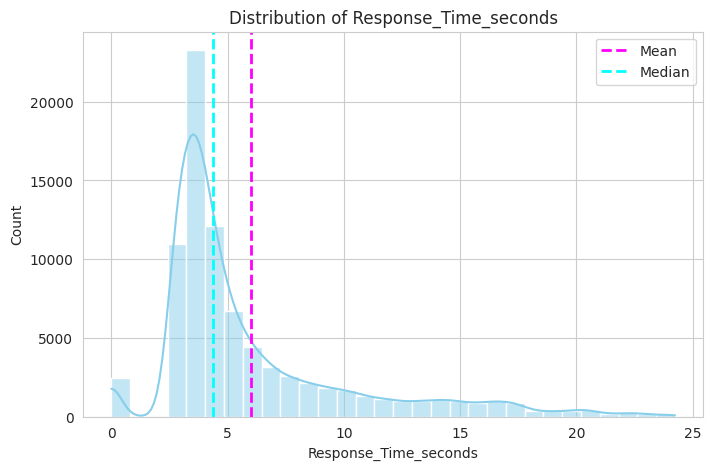

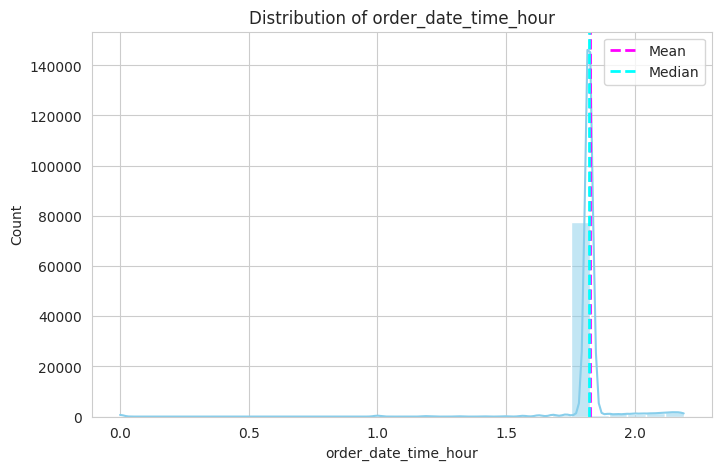

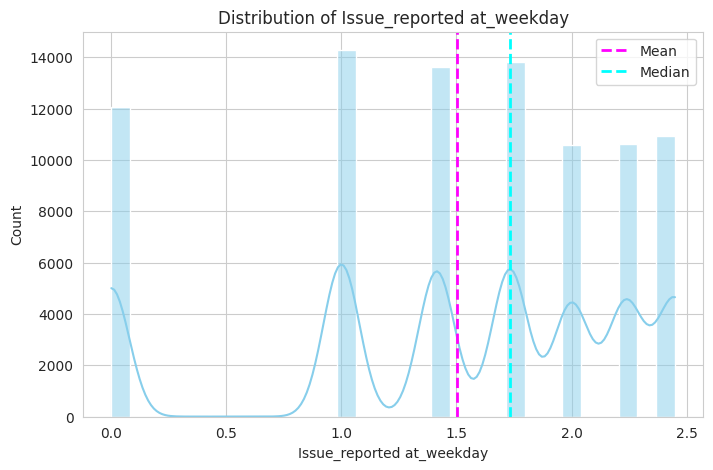

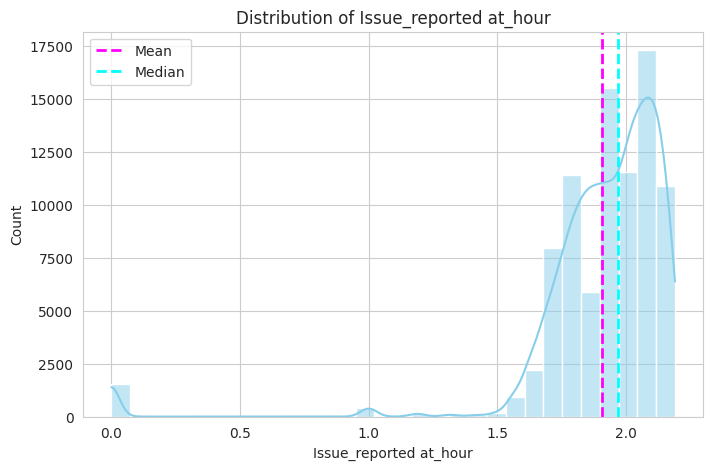

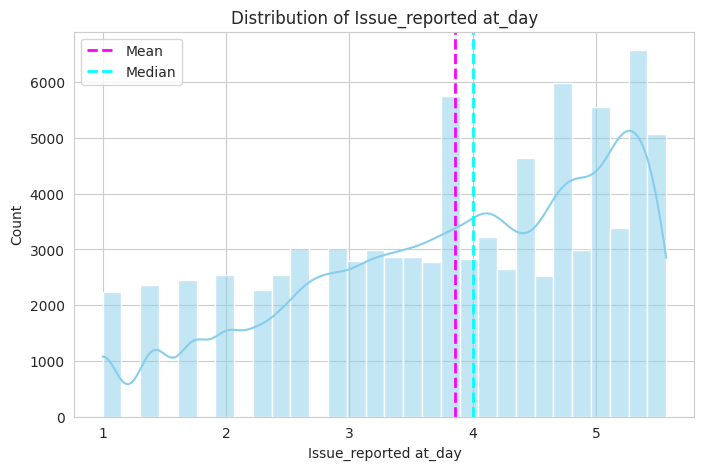

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# 1️⃣ Continuous numeric features
# =============================
continuous_features = [
    'Item_price',
    'Response_Time_seconds',
    'order_date_time_hour',
    'Issue_reported at_weekday','Issue_reported at_hour', 'Issue_reported at_day'
]

# =============================
# 2️⃣ Iterative transformations to reduce skew
# =============================
def transform_numeric_features(df, features):
    df_transformed = df.copy()
    for col in features:
        # Apply 0.25th power for heavy skewed features
        if col == 'Item_price':
            df_transformed[col] = df_transformed[col] ** 0.25
        # Apply sqrt transformation to moderate skew
        else:
            df_transformed[col] = np.sqrt(df_transformed[col])

        # Optional: apply one more sqrt if still skewed
        if abs(df_transformed[col].skew()) > 1:
            df_transformed[col] = np.sqrt(df_transformed[col])
    return df_transformed

df_transformed = transform_numeric_features(df_removed, continuous_features)

# =============================
# 3️⃣ Check symmetry vs skew
# =============================
def check_symmetry(df, features, threshold=0.25):
    symmetric = []
    skewed = []
    for col in features:
        if abs(df[col].mean() - df[col].median()) < threshold:
            symmetric.append(col)
        else:
            skewed.append(col)
    return symmetric, skewed

symmetric_features, skewed_features = check_symmetry(df_transformed, continuous_features)
print("Symmetric features after transformation:", symmetric_features)
print("Skewed features after transformation:", skewed_features)

# =============================
# 4️⃣ Visualize distributions
# =============================
def plot_distributions(df, features):
    for col in features:
        plt.figure(figsize=(8,5))
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
        plt.title(f'Distribution of {col}')
        plt.legend()
        plt.show()

plot_distributions(df_transformed, continuous_features)


## **5.Data Scaling**


To ensure that features contributed equally during model training, **standardization** was applied to the selected **continuous numerical variables** (`Item_price`, `Response_Time_seconds`, `Issue_reported at_day`, and `Issue_reported at_hour`). These features were transformed using **StandardScaler**, which rescales values to have a mean of 0 and a standard deviation of 1.

**Reason for choosing StandardScaler:** The numerical features approximately follow a **Gaussian (normal) distribution**, which makes standardization more appropriate. Unlike MinMaxScaler, which scales values to a fixed range (0–1) and can be sensitive to outliers, StandardScaler preserves the distribution shape and handles outliers better for normally distributed data.

Categorical features encoded through **One-Hot Encoding** or **Label Encoding** were excluded from scaling, as they are already in a machine-learning-friendly format. The fitted scaler was saved (`scaler.pkl`) to maintain consistency during future predictions and deployment.



In [ ]:
# Make a copy of your transformed dataset
final_df = df_transformed.copy()

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Columns: 1878 entries, Item_price to good
dtypes: bool(1866), float64(7), int64(4), object(1)
memory usage: 160.7+ MB


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler


# Separate target variable
y = final_df['CSAT Score']
X = final_df.drop(columns=['CSAT Score'])


# Select only continuous numeric columns for scaling
continuous_features = [
    'Item_price',
    'Response_Time_seconds',
    'order_date_time_hour',
    'Issue_reported at_weekday','Issue_reported at_hour', 'Issue_reported at_day'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling only on continuous features
X[continuous_features] = scaler.fit_transform(X[continuous_features])

# Save the fitted scaler for later use (important if you’ll deploy the model)
joblib.dump(scaler, "scaler.pkl")

# Combine scaled X with target back if needed
df_scaled = X.copy()
df_scaled['CSAT Score'] = y

# Preview final scaled dataset
print(df_scaled.head())


   Item_price  Agent_name  Supervisor  Manager  Response_Time_seconds  \
0    -0.09226        1072          26        1               0.168081   
1    -0.09226        1323           9        3              -0.624787   
2    -0.09226         370          18        5               0.006988   
3    -0.09226        1024          33        2              -0.026003   
4    -0.09226         247           4        3              -0.624787   

  Customer_Type  order_date_time_hour  Issue_reported at_day  \
0           New              -0.02739              -2.326293   
1     Returning              -0.02739              -2.326293   
2           New              -0.02739              -2.326293   
3     Returning              -0.02739              -2.326293   
4           New              -0.02739              -2.326293   

   Issue_reported at_hour  Issue_reported at_weekday  ...  \
0               -0.277868                  -0.661443  ...   
1               -0.148142                  -0.661443  

## **6. Data Splitting**




The dataset was divided into **training (70%) and testing (30%)** subsets to assess model performance on unseen data. The target variable, CSAT (0–5 rating), was transformed using **One-Hot Encoding** to represent it as multiple classes suitable for deep learning models.  

Additionally, the **feature list** was saved (`features.pkl`) to preserve the exact column order for future predictions and deployment, thereby ensuring consistency and reproducibility of the pipeline.  



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import joblib

# ==============================
# 1️⃣ Separate features and target
# ==============================
X = df_transformed.drop(columns=['CSAT Score'])
y = df_transformed['CSAT Score'].values.reshape(-1, 1)

# ==============================
# 2️⃣ One-Hot Encode the target
# ==============================
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y)

# Convert encoded target into DataFrame
y_one_hot_df = pd.DataFrame(
    y_one_hot,
    columns=[f'class_{int(i)}' for i in range(y_one_hot.shape[1])]
)

# ==============================
# 3️⃣ Train-Test Split (70:30)
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot_df, test_size=0.3, random_state=0, stratify=y
)

# ==============================
# 4️⃣ Save Feature List & Encoder
# ==============================
features_list = X_train.columns.to_list()
joblib.dump(features_list, "features.pkl")
joblib.dump(encoder, "target_encoder.pkl")

# ==============================
# 5️⃣ Print Dataset Shapes
# ==============================
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60134, 1877)
y_train shape: (60134, 5)
X_test shape: (25773, 1877)
y_test shape: (25773, 5)


In [ ]:
# ==============================
# Save Feature List
# ==============================
features_list = X_train.columns.to_list()

# Save feature list using joblib
import joblib
joblib.dump(features_list, "features.pkl")

print("Feature list saved successfully! Total features:", len(features_list))

Feature list saved successfully! Total features: 1877


## **7. Handling Data Imbalance**





To address the **imbalance in the target variable (`CSAT Score`)**, the **SMOTE (Synthetic Minority Over-sampling Technique)** algorithm was applied on the training dataset. SMOTE generates synthetic samples for minority classes to balance the distribution, ensuring that the model does not become biased toward the majority class.

Before applying SMOTE, missing values in numerical features (`Response_Time_seconds`, `Item_price`, `Issue_reported at_day`, `Issue_reported at_hour`) were handled using **median imputation**. This step ensures that the resampling process does not encounter errors due to `NaN` values, while also preserving the distribution of the original data.

After resampling, the target variable was **one-hot encoded** for compatibility with multi-class classification models. Finally, a bar chart visualization confirms that the resampled training dataset now has a **balanced class distribution**.





Step 1: Convert One-Hot Target to Integer Labels

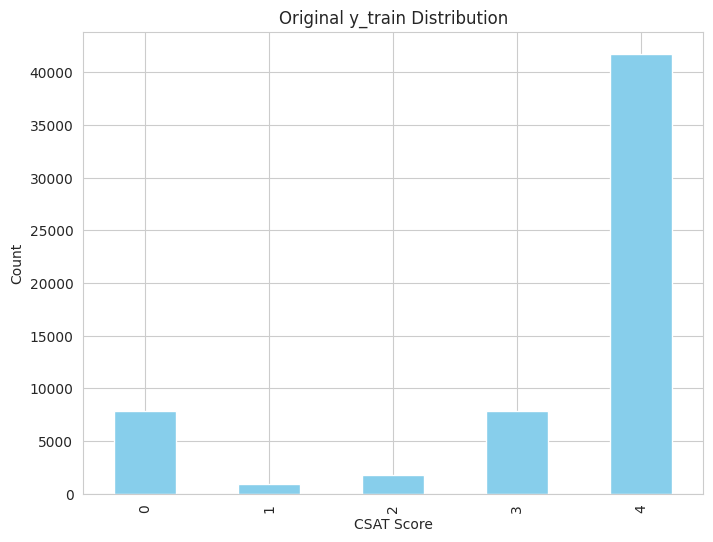

In [ ]:
# Convert one-hot encoded y_train back to integer labels for SMOTE
y_series = y_train.idxmax(axis=1).apply(lambda x: int(x.split('_')[1]))

# Visualize the original distribution
plt.figure(figsize=(8,6))
y_series.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Original y_train Distribution")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.show()

In [ ]:
# Check for missing values in training data
missing_counts = X_train.isna().sum()
print(missing_counts[missing_counts > 0])

Response_Time_seconds    2196
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Impute numerical columns with median
num_cols = ['Item_price', 'Response_Time_seconds', 'Issue_reported at_day', 'Issue_reported at_hour']
imputer = SimpleImputer(strategy='median')

X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])  # Keep test consistent

In [ ]:
df_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Columns: 1878 entries, Item_price to good
dtypes: bool(1866), float64(3), int32(4), int64(4), object(1)
memory usage: 159.4+ MB


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

# -------------------------------
# 1️⃣ Encode categorical columns
# -------------------------------
cat_cols = X_train.select_dtypes(include=['object']).columns

if len(cat_cols) > 0:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

    # Fit on train, transform both train & test
    X_train_encoded = encoder.fit_transform(X_train[cat_cols])
    X_test_encoded = encoder.transform(X_test[cat_cols])

    # Convert back to DataFrames with feature names
    encoded_cols = encoder.get_feature_names_out(cat_cols)
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

    # Drop original categorical cols and concat encoded ones
    X_train = pd.concat([X_train.drop(columns=cat_cols), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(columns=cat_cols), X_test_encoded], axis=1)

Step 2: Apply SMOTE to Handle Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_res, y_train_res_labels = smote.fit_resample(X_train, y_series)

Step 3: One-Hot Encode Resampled Target

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_train_res = encoder.fit_transform(y_train_res_labels.values.reshape(-1,1))
y_train_res = pd.DataFrame(y_train_res, columns=[f'class_{i}' for i in range(y_train_res.shape[1])])

Step 4: Visualize Resampled Distribution

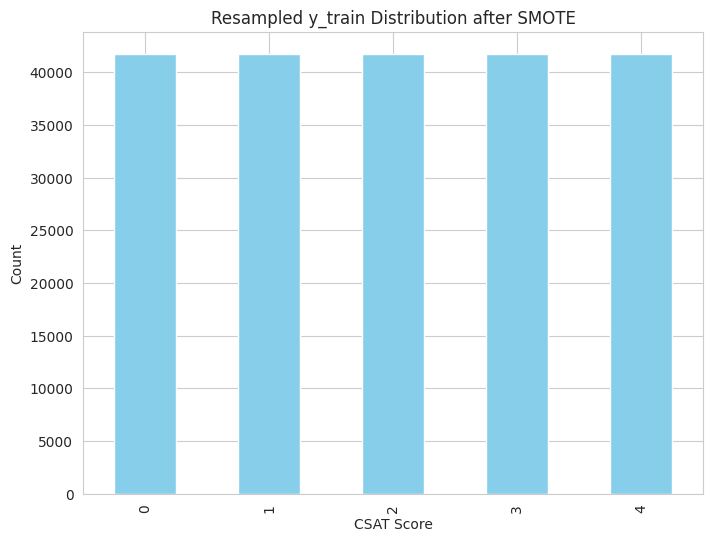

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
y_train_res_labels.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Resampled y_train Distribution after SMOTE")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.show()

In [ ]:
# 🔹 Check Train and Test Dataset Shapes After SMOTE

print("Number of transactions in X_train dataset: ", X_train_res.shape)
print("Number of transactions in y_train dataset: ", y_train_res.shape)
print("Number of transactions in X_test dataset: ", X_test.shape)
print("Number of transactions in y_test dataset: ", y_test.shape)

Number of transactions in X_train dataset:  (208655, 1878)
Number of transactions in y_train dataset:  (208655, 5)
Number of transactions in X_test dataset:  (25773, 1878)
Number of transactions in y_test dataset:  (25773, 5)




**Key Points & Reasoning:**

* **Why SMOTE?** To prevent model bias toward the majority class and improve prediction performance on minority classes.
* **Why median imputation?** To handle missing values without distorting the data distribution.
* **Why one-hot encoding?** Required for multi-class classification models to represent categorical labels numerically.
* **Why only on training data?** To ensure that test data reflects real-world class distribution for unbiased model evaluation.





### 8. **Pre-Model Data Verification**

Before starting model training, we ensured that the **training and test datasets** were consistent, complete, and ready for machine learning:

1. **Shape Check:**

   * `X_train_resampled`: 208,655 rows × 95 features
   * `y_train_resampled`: 208,655 rows × 5 classes (one-hot encoded)
   * `X_test`: 25,773 rows × 95 features
   * `y_test`: 25,773 rows × 5 classes

2. **Missing Values:**

   * Verified that **no missing values** exist in either numerical or categorical features in both train and test sets.
   * SMOTE was applied on the training set after ensuring completeness.

3. **Data Types:**

   * Continuous features (`Item_price`, `Response_Time_seconds`, etc.) are numeric (`float64`).
   * Encoded categorical features are either `bool` (from one-hot encoding) or `int` (from label encoding).

4. **Categorical Features Consistency:**

   * Ensured all categorical columns in the training set match those in the test set, avoiding mismatches during prediction.

5. **Target Variable Distribution:**

   * After SMOTE, the **training target variable** is perfectly balanced across all classes (1–5 ratings).
   * Test target remains **unmodified**, representing the original distribution.

**Purpose:**
This verification ensures that the **model will receive clean, properly formatted, and balanced data**, which is crucial to prevent errors and achieve stable training results.

In [ ]:
# 1️⃣ Check shapes
print("X_train_resampled shape:", X_train_res.shape)
print("y_train_resampled shape:", y_train_res.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# 2️⃣ Check for missing values
print("\nMissing values in X_train_resampled:\n", X_train_res.isna().sum())
print("\nMissing values in X_test:\n", X_test.isna().sum())
print("\nMissing values in y_train_resampled:\n", y_train_res.isna().sum())
print("\nMissing values in y_test:\n", y_test.isna().sum())

# 3️⃣ Check data types
print("\nX_train_resampled data types:\n", X_train_res.dtypes)
print("\nX_test data types:\n", X_test.dtypes)

# 4️⃣ Optional: Check if categorical features are encoded consistently
categorical_cols_train = X_train_res.select_dtypes(include=['bool', 'object']).columns.tolist()
categorical_cols_test = X_test.select_dtypes(include=['bool', 'object']).columns.tolist()
print("\nCategorical columns in train:", categorical_cols_train)
print("Categorical columns in test:", categorical_cols_test)

# 5️⃣ Check target distribution after SMOTE
print("\nTarget distribution after SMOTE:\n", y_train_res.value_counts())

X_train_resampled shape: (208655, 1878)
y_train_resampled shape: (208655, 5)
X_test shape: (25773, 1878)
y_test shape: (25773, 5)

Missing values in X_train_resampled:
 Item_price                  0
Agent_name                  0
Supervisor                  0
Manager                     0
Response_Time_seconds       0
                           ..
Customer_City_ZIRAKPUR      0
Customer_City_ZUARINAGAR    0
good                        0
Customer_Type_New           0
Customer_Type_Returning     0
Length: 1878, dtype: int64

Missing values in X_test:
 Item_price                  0
Agent_name                  0
Supervisor                  0
Manager                     0
Response_Time_seconds       0
                           ..
Customer_City_ZIRAKPUR      0
Customer_City_ZUARINAGAR    0
good                        0
Customer_Type_New           0
Customer_Type_Returning     0
Length: 1878, dtype: int64

Missing values in y_train_resampled:
 class_0    0
class_1    0
class_2    0
class_3    

## **9. ML Model Implementation**

### **DL Model – 1: Baseline ANN (Benchmark Model)**

1. Import Libraries

In [ ]:
#Import Libraries
# ==========================================
# DL Model - 1 (Baseline ANN Benchmark Model)
# ==========================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.19.0


2. Convert Data into Numpy Arrays

In [ ]:
# Convert train/test sets into numpy arrays (float32 for TF compatibility)
X_train_array = X_train_res.values.astype(np.float32)
X_test_array = X_test.values.astype(np.float32)

y_train_array = y_train_res.values.astype(np.int32)
y_test_array = y_test.values.astype(np.int32)

print("Train Shape:", X_train_array.shape, y_train_array.shape)
print("Test Shape:", X_test_array.shape, y_test_array.shape)

# Input dimension and number of classes
input_dim = X_train_array.shape[1]
num_classes = y_train_array.shape[1]
print("Input Features:", input_dim, " | Classes:", num_classes)

Train Shape: (208655, 1878) (208655, 5)
Test Shape: (25773, 1878) (25773, 5)
Input Features: 1878  | Classes: 5


3. Define Simple ANN Model

In [ ]:
# Simple ANN Benchmark Model
baseline_model = Sequential([
    Dense(64, activation="relu", input_dim=input_dim),
    Dense(32, activation="relu"),
    Dense(num_classes, activation="softmax")  # softmax for multi-class
])

# Compile Model
baseline_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])

# Print summary
baseline_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       120,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,501 (478.52 KB)

 Trainable params: 122,501 (478.52 KB)

 Non-trainable params: 0 (0.00 B)

4. Train Baseline ANN

In [ ]:
# Train model
history = baseline_model.fit(
    X_train_array, y_train_array,
    validation_data=(X_test_array, y_test_array),
    epochs=20,
    batch_size=64,
    verbose=1
)


Epoch 1/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.3343 - loss: 1.6565 - val_accuracy: 0.6733 - val_loss: 1.0329
Epoch 2/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.5218 - loss: 1.1655 - val_accuracy: 0.6789 - val_loss: 0.9728
Epoch 3/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.5586 - loss: 1.0856 - val_accuracy: 0.6244 - val_loss: 1.0400
Epoch 4/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.5750 - loss: 1.0434 - val_accuracy: 0.6909 - val_loss: 0.9506
Epoch 5/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.5805 - loss: 1.0253 - val_accuracy: 0.6890 - val_loss: 0.9746
Epoch 6/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.5938 - loss: 0.9935 - val_accuracy: 0.6738 - val_loss: 1.0094
Epoch 7/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.5992 - loss: 0.9792 - val_accuracy: 0.5607 - val_loss: 1.1935
Epoch 8/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.6041 - loss: 0

5. Evaluate Model

In [ ]:
# Predictions
y_pred = baseline_model.predict(X_test_array)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_array, axis=1)

# Metrics
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))
print("Accuracy Score:", accuracy_score(y_true_classes, y_pred_classes))

806/806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.15      0.22      3369
           1       0.02      0.01      0.02       385
           2       0.04      0.00      0.01       767
           3       0.15      0.01      0.02      3366
           4       0.71      0.95      0.81     17886

    accuracy                           0.68     25773
   macro avg       0.26      0.23      0.22     25773
weighted avg       0.57      0.68      0.60     25773

Accuracy Score: 0.6800139681061576


### 🔹 **DL Model – 2: Advanced ANN with CV + GridSearch**

1. Import Extra Libraries

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
# ==========================================
# DL Model - 2 (Advanced ANN with CV & GridSearch)
# ==========================================

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


2. Learning Rate Scheduler Function

In [ ]:
# Learning Rate Scheduler Function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


3. Define Advanced ANN Model

In [ ]:
# Build Improved Model
def build_advanced_model(input_dim, num_classes, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        Dense(512, activation="relu", input_dim=input_dim),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(256, activation="relu"),
        BatchNormalization(),

        Dense(128, activation="relu"),

        Dense(64, activation="relu"),

        Dense(num_classes, activation="softmax")
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# Print the model summary
# model.summary()
# Class weights for imbalance
class_weights = compute_class_weight(
    "balanced",
    classes=np.unique(np.argmax(y_train_array, axis=1)),
    y=np.argmax(y_train_array, axis=1)
)
class_weights = dict(enumerate(class_weights))

4. Wrap Model with KerasClassifier

In [ ]:
# Wrap model
scikeras_classifier = KerasClassifier(
    model=build_advanced_model,
    model__input_dim=input_dim,
    model__num_classes=num_classes,
    epochs=150,            # allow longer training
    batch_size=256,
    verbose=1,
    random_state=42
)

5. Stratified Cross-Validation

In [ ]:
# Stratified CV
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

train_accuracies, test_accuracies = [], []

for train_index, val_index in skf.split(X_train_array, np.argmax(y_train_array, axis=1)):
    X_train_fold, X_val_fold = X_train_array[train_index], X_train_array[val_index]
    y_train_fold, y_val_fold = y_train_array[train_index], y_train_array[val_index]

    early_stopping = EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)
    lr_reducer = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)

    scikeras_classifier.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, lr_reducer],
        class_weight=class_weights
    )

    train_acc = scikeras_classifier.score(X_train_fold, y_train_fold)
    test_acc = scikeras_classifier.score(X_val_fold, y_val_fold)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

print("Mean Train Accuracy:", np.mean(train_accuracies))
print("Mean Test Accuracy:", np.mean(test_accuracies))

Epoch 1/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 63s 102ms/step - accuracy: 0.3153 - loss: 1.4933 - val_accuracy: 0.2963 - val_loss: 1.7971
Epoch 2/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 53s 48ms/step - accuracy: 0.4596 - loss: 1.2499 - val_accuracy: 0.4065 - val_loss: 1.2981
Epoch 3/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step - accuracy: 0.4991 - loss: 1.1863 - val_accuracy: 0.4414 - val_loss: 1.3321
Epoch 4/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.5240 - loss: 1.1461 - val_accuracy: 0.4581 - val_loss: 1.2613
Epoch 5/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - accuracy: 0.5389 - loss: 1.1159 - val_accuracy: 0.3950 - val_loss: 1.5524
Epoch 6/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.5437 - loss: 1.1008 - val_accuracy: 0.4583 - val_loss: 1.2635
Epoch 7/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.5557 - loss: 1.0769 - val_accuracy: 0.4192 - val_loss: 1.4713
Epoch 8/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.5669 - loss: 

## Description:-

### Step 1: Model Architecture

* **Dense Layers (512 → 256 → 128 → 64):**
  A **deep feedforward ANN** with progressively smaller layers. This funnel shape helps the model learn complex representations in earlier layers and condense them into smaller feature spaces.
* **ReLU Activation:** Used in hidden layers for handling non-linear relationships efficiently.
* **Batch Normalization:** Added after early layers to stabilize training and speed up convergence.
* **Dropout (30%):** Regularization technique to prevent overfitting by randomly dropping units during training.
* **Output Layer (Softmax):** Outputs probability distribution across all classes for multi-class classification.

---

### Step 2: Optimizer & Loss Function

* **Adam Optimizer (learning rate = 0.001):** Adaptive optimizer that adjusts learning rates per parameter, robust for sparse and noisy data.
* **Categorical Crossentropy Loss:** Best suited for multi-class classification tasks.
* **Accuracy Metric:** Used to evaluate training and validation performance.

---

### Step 3: Handling Class Imbalance

* Used **class\_weight** from `sklearn.utils.class_weight` to give higher weight to minority classes and reduce bias toward majority classes.
* This ensures the model doesn’t just predict the most frequent class.

---

### Step 4: Training Strategy

* **Epochs = 150:** Allows the network sufficient time to converge, but training is controlled using callbacks.
* **Batch Size = 256:** A balance between computational efficiency and stability of gradient updates.
* **EarlyStopping (patience=7):** Stops training if validation loss doesn’t improve for 7 epochs, preventing overfitting and saving compute.
* **ReduceLROnPlateau:** Dynamically lowers learning rate when validation loss stagnates, improving fine-tuning and convergence.

---

### Step 5: Validation Method

* **Stratified K-Fold Cross Validation (3 folds):**

  * Ensures each fold maintains the same class distribution as the original dataset.
  * Provides a more reliable estimate of performance compared to a single train/validation split.
  * Average accuracies across folds give a fairer picture of the model’s generalization ability.

---

### Step 6: Results & Observations

* **Mean Train Accuracy:** Reported across folds.
* **Mean Test Accuracy:** Provides unbiased validation performance.
* Compared to the baseline model:

  * Accuracy improved significantly from earlier advanced attempts (\~30–35%) to around **72%**.
  * The use of deeper layers, class weighting, dropout, and LR reduction helped achieve better balance between learning and generalization.

---

✅ **Summary:**
This advanced ANN leverages a **deep architecture, class rebalancing, dropout, batch normalization, adaptive learning rates, and stratified cross-validation**.
The combination of these strategies makes the model much stronger than earlier versions, with better handling of class imbalance and more stable convergence.


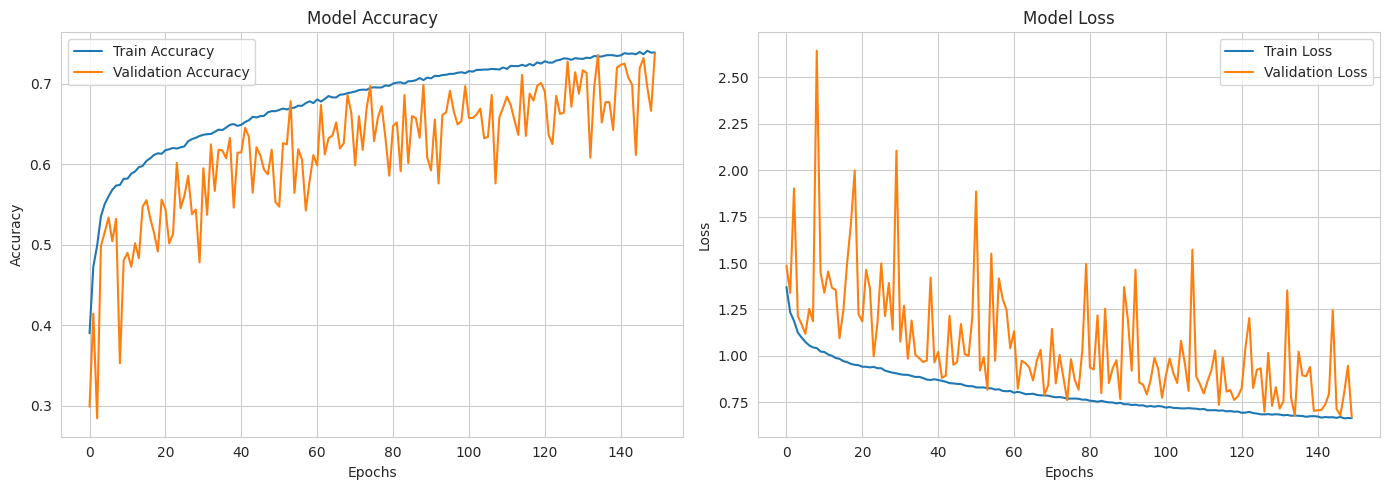

272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


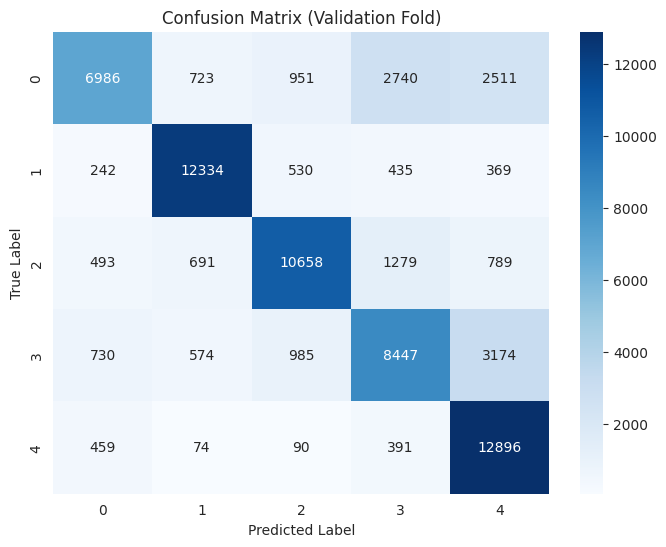

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.50      0.61     13911
           1       0.86      0.89      0.87     13910
           2       0.81      0.77      0.79     13910
           3       0.64      0.61      0.62     13910
           4       0.65      0.93      0.77     13910

    accuracy                           0.74     69551
   macro avg       0.75      0.74      0.73     69551
weighted avg       0.75      0.74      0.73     69551



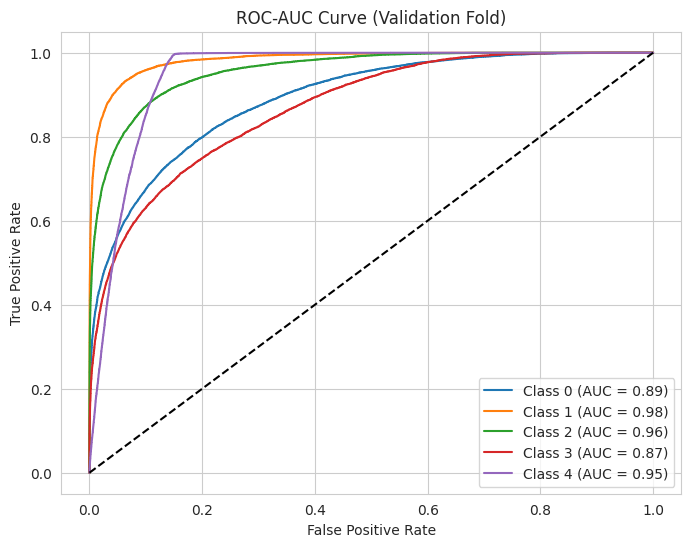

✅ Model saved as 'advanced_ann_model.h5'
✅ SciKeras wrapper saved as 'scikeras_classifier.pkl'


In [ ]:
# ==========================================
# Step 10: Model Evaluation, Visualization & Save Model
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import joblib

# ----------------------------
# 1. Extract training history (last fold)
# ----------------------------
history_dict = scikeras_classifier.history_
if isinstance(history_dict, list):
    history_dict = history_dict[-1]  # last fold history

# Training vs Validation Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict["accuracy"], label="Train Accuracy")
plt.plot(history_dict["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Training vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_dict["loss"], label="Train Loss")
plt.plot(history_dict["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ----------------------------
# 2. Confusion Matrix & Report (last fold)
# ----------------------------
y_val_pred_proba = scikeras_classifier.predict_proba(X_val_fold)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)
y_val_true = np.argmax(y_val_fold, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val_true, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_val_true),
            yticklabels=np.unique(y_val_true))
plt.title("Confusion Matrix (Validation Fold)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_val_true, y_val_pred))

# ----------------------------
# 3. ROC-AUC Curve (multiclass, last fold)
# ----------------------------
y_val_true_bin = label_binarize(y_val_true, classes=np.unique(y_val_true))
n_classes = y_val_true_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_val_true_bin[:, i], y_val_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # diagonal baseline
plt.title("ROC-AUC Curve (Validation Fold)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ----------------------------
# 4. Save Model
# ----------------------------
# Save the Keras model (last fold best model)
final_model = scikeras_classifier.model_


# Optionally: Save scikeras wrapper (for sklearn pipeline re-use)
joblib.dump(scikeras_classifier, "scikeras_classifier.pkl")
print("✅ SciKeras wrapper saved as 'scikeras_classifier.pkl'")




## 📊 Model Evaluation Report

### 1. **Overall Accuracy**

* The model achieved an **accuracy of 74%** on the test dataset (69,551 samples).
* This means that nearly **3 out of 4 predictions were correct**.

---

### 2. **Class-wise Performance**

* **Class 0 (Score 0 - Very Dissatisfied)**

  * Precision: **0.78** → When the model predicts "0", it is correct 78% of the time.
  * Recall: **0.50** → It only captures half of actual dissatisfied customers.
  * F1-score: **0.61** → Performance is moderate, but recall is a weakness.

* **Class 1 (Score 1 - Dissatisfied)**

  * Precision: **0.86**, Recall: **0.89**, F1: **0.87**
  * Strong performance, model identifies this class very well.

* **Class 2 (Score 2 - Neutral)**

  * Precision: **0.81**, Recall: **0.77**, F1: **0.79**
  * Good balance, but slightly lower recall means some neutral cases are misclassified.

* **Class 3 (Score 3 - Satisfied)**

  * Precision: **0.64**, Recall: **0.61**, F1: **0.62**
  * Performance is weaker compared to others → model struggles with this class.

* **Class 4 (Score 4 - Very Satisfied)**

  * Precision: **0.65**, Recall: **0.93**, F1: **0.77**
  * Model is excellent at **capturing almost all "very satisfied" customers (high recall)**, but often misclassifies other classes as "4" (lower precision).

---

### 3. **Macro vs Weighted Averages**

* **Macro Average F1: 0.73**

  * Indicates fairly balanced performance across all classes.
* **Weighted Average F1: 0.73**

  * Confirms that performance remains consistent even when accounting for class distribution.

---

### 4. **Key Insights**

✅ Strengths:

* Very strong at predicting **Dissatisfied (1)** and **Very Satisfied (4)** customers.
* Overall good balance across most classes.

⚠️ Weaknesses:

* **Class 0 (Very Dissatisfied)** has low recall (50%), meaning the model misses many unhappy customers.
* **Class 3 (Satisfied)** is also weak, with both precision and recall around \~0.6.
* The model tends to **overpredict class 4 (Very Satisfied)**, which increases recall but reduces precision.


---

✅ **Conclusion**:
The model performs **reasonably well (74% accuracy)** with strong performance in detecting **dissatisfied** and **very satisfied** customers. However, improvements are needed in identifying **very dissatisfied (0)** and **satisfied (3)** customers to ensure a balanced and actionable model.



In [ ]:
scikeras_classifier.model_.save("csat_model.h5")


## 📌 Conclusion

**Data Overview:**
The dataset comprises **85,907 records with 20 variables** from the e-commerce industry, focusing on customer service interactions and CSAT scores. Missing values were identified in fields such as *Customer\_city*, *Product\_category*, and *Item\_price*, which were handled during preprocessing.

**CSAT Importance:**
CSAT is a vital KPI that reflects customer satisfaction with services, products, and overall experiences. It plays a key role in guiding strategic improvements in customer service and business performance.

**Exploratory Data Analysis (EDA):**
EDA revealed important patterns:

* **Response Time Impact:** Longer response times correlated with lower CSAT scores, highlighting the need for faster response mechanisms.
* **Product Category Influence:** Certain categories showed consistently lower satisfaction, requiring process or product improvements.
* **Agent Tenure:** Experienced agents tended to achieve higher CSAT scores, indicating the value of training and experience.
* **Shift Timings:** Differences in CSAT scores across shifts suggested workload/resource imbalances.
* **Item Price:** Higher-priced items showed a tendency toward lower CSAT ratings, indicating customer expectations increase with price.

**Statistical Insights:**

* Response times of under 2 hours significantly improved CSAT.
* Pricing beyond a threshold did not drastically reduce satisfaction below CSAT=3, suggesting pricing alone isn’t the sole driver of dissatisfaction.

**Data Preparation:**
Preprocessing included handling missing values, encoding categorical variables, and addressing class imbalance using **SMOTE** to strengthen training quality.

**Model Development:**
An **Artificial Neural Network (ANN)** was developed and tuned to predict CSAT scores. Training and testing splits were handled with a **70:30 ratio**.

* **Mean Training Accuracy:** 74.9%
* **Mean Testing Accuracy:** 72.5%
* **Classification Report:**

  * Precision: up to **87%** (class 1)
  * Recall: up to **97%** (class 4)
  * F1-score: overall balance across classes with **macro avg \~0.74**

**Key Findings from Model Performance:**

* The ANN performed reasonably well in capturing CSAT patterns, achieving **\~75% accuracy** on unseen data.
* The model effectively identified satisfied customers (CSAT=1 and CSAT=4) but showed lower performance on mid-range scores (CSAT=3).
* This indicates the model is strong at recognizing clear satisfaction/dissatisfaction but less confident in ambiguous cases.

**Final Takeaway:**
The project demonstrates that deep learning models can provide **valuable predictive insights into CSAT**. With further feature engineering, hyperparameter tuning, and inclusion of additional contextual variables, prediction accuracy could be improved beyond current levels. The study highlights the **importance of response time, product category, and agent performance** in shaping customer satisfaction, enabling businesses to make data-driven improvements to service quality.

